In [30]:
# Importing all the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# loading csv file into pandas dataframe and skipped the 1st row
df_survey = pd.read_csv('kaggle_survey_2020_responses.csv',low_memory=False,header=0,skiprows=[1])

In [3]:
# Displaying first five rows of data 
df_survey.head()

Time from Start to Finish (seconds)     Q1   Q2                        Q3  \
0                                 1838  35-39  Man                  Colombia   
1                               289287  30-34  Man  United States of America   
2                                  860  35-39  Man                 Argentina   
3                                  507  30-34  Man  United States of America   
4                                   78  30-34  Man                     Japan   

                  Q4                 Q5           Q6 Q7_Part_1 Q7_Part_2  \
0    Doctoral degree            Student   5-10 years    Python         R   
1    Master’s degree      Data Engineer   5-10 years    Python         R   
2  Bachelor’s degree  Software Engineer  10-20 years       NaN       NaN   
3    Master’s degree     Data Scientist   5-10 years    Python       NaN   
4    Master’s degree  Software Engineer    3-5 years    Python       NaN   

  Q7_Part_3  ... Q35_B_Part_2 Q35_B_Part_3 Q35_B_Part_4   Q35_B_Part_5  \
0       SQL  ...          NaN          NaN          NaN   TensorBoard    
1       SQL  ...          NaN          NaN          NaN            NaN   
2       NaN  ...          NaN          NaN          NaN            NaN   
3       SQL  ...          NaN          NaN          NaN            NaN   
4       NaN  ...          NaN          NaN          NaN            NaN   

  Q35_B_Part_6 Q35_B_Part_7 Q35_B_Part_8 Q35_B_Part_9 Q35_B_Part_10  \
0          NaN          NaN          NaN          NaN           NaN   
1          NaN          NaN          NaN          NaN           NaN   
2          NaN          NaN          NaN          NaN          None   
3          NaN          NaN          NaN          NaN           NaN   
4          NaN          NaN          NaN          NaN           NaN   

  Q35_B_OTHER  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  

[5 rows x 355 columns]

From above data, we can that most of the columns have missing values, But this is because responses to multiple choice 
questions (only a single choice can be selected) were recorded in individual columns. Responses to multiple selection questions (multiple choices can be selected)were split into multiple columns (with one column per answer choice).

In [4]:
# Renaming column name from 'Time from Start to Finish (seconds)' to 'Time to Finish(seconds)' 
df_survey.rename(columns={'Time from Start to Finish (seconds)':'Time to Finish(seconds)'},inplace=True)

In [5]:
# Calling info method to get summary of survey data
df_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20036 entries, 0 to 20035
Columns: 355 entries, Time to Finish(seconds) to Q35_B_OTHER
dtypes: int64(1), object(354)
memory usage: 54.3+ MB


In [6]:
# displaying the shape of dataframe
df_survey.shape

(20036, 355)

Data set more than 20k rows and 355 columns

In [252]:
# Calculating number of unique data point 
len(df_survey['Time to Finish(seconds)'].value_counts())

4195

In [243]:
# Displaying five point summary of numeric data
df_survey.describe()

Time to Finish(seconds)
count             2.003600e+04
mean              9.155865e+03
std               6.136760e+04
min               2.000000e+01
25%               3.980000e+02
50%               6.260000e+02
75%               1.030250e+03
max               1.144493e+06

In [8]:
#Displaying summary of categorical data
df_survey.describe(include=np.object).iloc[:,6:]

Q7_Part_1 Q7_Part_2 Q7_Part_3 Q7_Part_4 Q7_Part_5 Q7_Part_6  \
count      15530      4277      7535      3315      3827      3367   
unique         1         1         1         1         1         1   
top       Python         R       SQL         C       C++      Java   
freq       15530      4277      7535      3315      3827      3367   

         Q7_Part_7 Q7_Part_8 Q7_Part_9 Q7_Part_10  ...        Q35_B_Part_2  \
count         2995       262       198       1776  ...                1177   
unique           1         1         1          1  ...                   1   
top     Javascript     Julia     Swift       Bash  ...   Weights & Biases    
freq          2995       262       198       1776  ...                1177   

       Q35_B_Part_3          Q35_B_Part_4   Q35_B_Part_5 Q35_B_Part_6  \
count           494                   430           3199          557   
unique            1                     1              1            1   
top       Comet.ml    Sacred + Omniboard    TensorBoard     Guild.ai    
freq            494                   430           3199          557   

       Q35_B_Part_7 Q35_B_Part_8            Q35_B_Part_9 Q35_B_Part_10  \
count           480          846                     519          3082   
unique            1            1                       1             1   
top       Polyaxon       Trains    Domino Model Monitor           None   
freq            480          846                     519          3082   

       Q35_B_OTHER  
count          251  
unique           1  
top          Other  
freq           251  

[4 rows x 348 columns]

In [9]:
# displaying data types of each columns
df_survey.dtypes

Time to Finish(seconds)     int64
Q1                         object
Q2                         object
Q3                         object
Q4                         object
                            ...  
Q35_B_Part_7               object
Q35_B_Part_8               object
Q35_B_Part_9               object
Q35_B_Part_10              object
Q35_B_OTHER                object
Length: 355, dtype: object

only one columns is of int type rest all are categorical data

In [245]:
# Dispalying missing values of first 15 columns
df_survey.isna().sum().head(15)

Time to Finish(seconds)        0
Q1                             0
Q2                             0
Q3                             0
Q4                           467
Q5                           759
Q6                           916
Q7_Part_1                   4506
Q7_Part_2                  15759
Q7_Part_3                  12501
Q7_Part_4                  16721
Q7_Part_5                  16209
Q7_Part_6                  16669
Q7_Part_7                  17041
Q7_Part_8                  19774
dtype: int64

#### looks dataset have lot of missing values

### Now start looking the distribution of data for each columns 

<AxesSubplot:ylabel='Frequency'>

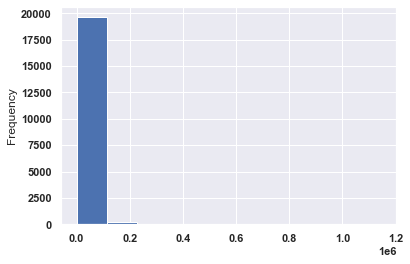

In [256]:
# Displaying distribution of column 'Time to Finish(seconds)'
df_survey['Time to Finish(seconds)'].plot.hist()

In [298]:
# sets the font of all items to the font specified by the kwargs object, font.
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}
plt.rc('font', **font)

Text(0.5, 1.0, 'No of participants from each country')

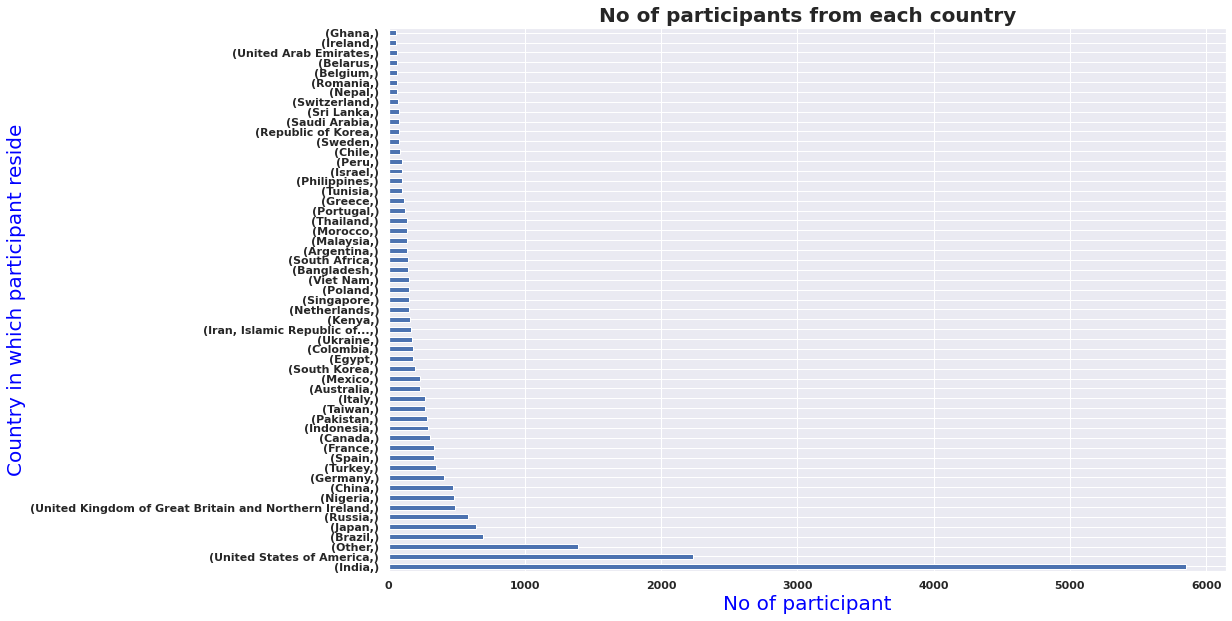

In [300]:
# display distribution of columns Q3
plt.figure(figsize=(15,10))
df_survey[['Q3']].value_counts().plot(kind='barh')
plt.ylabel("Country in which participant reside",fontsize=20).set_color('blue')
plt.xlabel("No of participant",fontsize=20).set_color('blue')
plt.title("No of participants from each country",fontweight="bold",fontsize=20)

Most of the participant are from India followed by USA. Here countries or territory received less than 50 respondents. have been grouped named "other" for anonymity.

Text(0.5, 1.0, 'highest level of formal education that you have attained or plan to attain within the next 2 years')

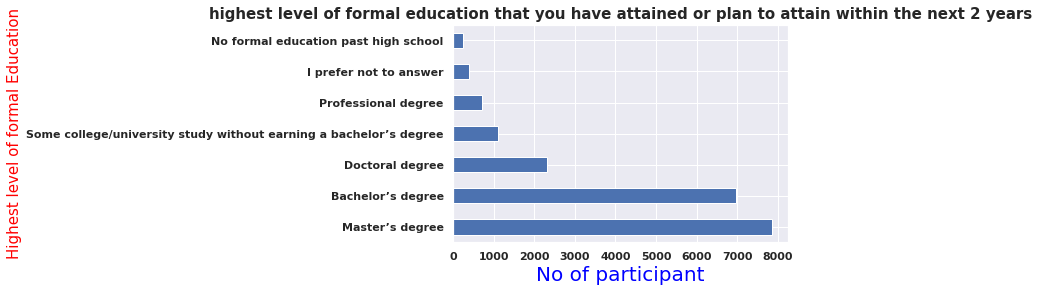

In [302]:
# Displaying distribution of column 'Q4'
df_survey['Q4'].value_counts().plot(kind='barh'); #Specify a horizontal barplot ('barh') as kind of plot (kind=)
plt.ylabel("Highest level of formal Education",fontsize=15).set_color('red')
plt.xlabel("No of participant",fontsize=20).set_color('blue')
plt.title("highest level of formal education that you have attained or plan to attain within the next 2 years",fontweight="bold",fontsize=15)

From above distribution, we can say that most of participant either have masters degree or planning to have Master's degree in next 2 years.

In [16]:
# displaying columns name
df_survey.columns

Index(['Time to Finish(seconds)', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6',
       'Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3',
       ...
       'Q35_B_Part_2', 'Q35_B_Part_3', 'Q35_B_Part_4', 'Q35_B_Part_5',
       'Q35_B_Part_6', 'Q35_B_Part_7', 'Q35_B_Part_8', 'Q35_B_Part_9',
       'Q35_B_Part_10', 'Q35_B_OTHER'],
      dtype='object', length=355)

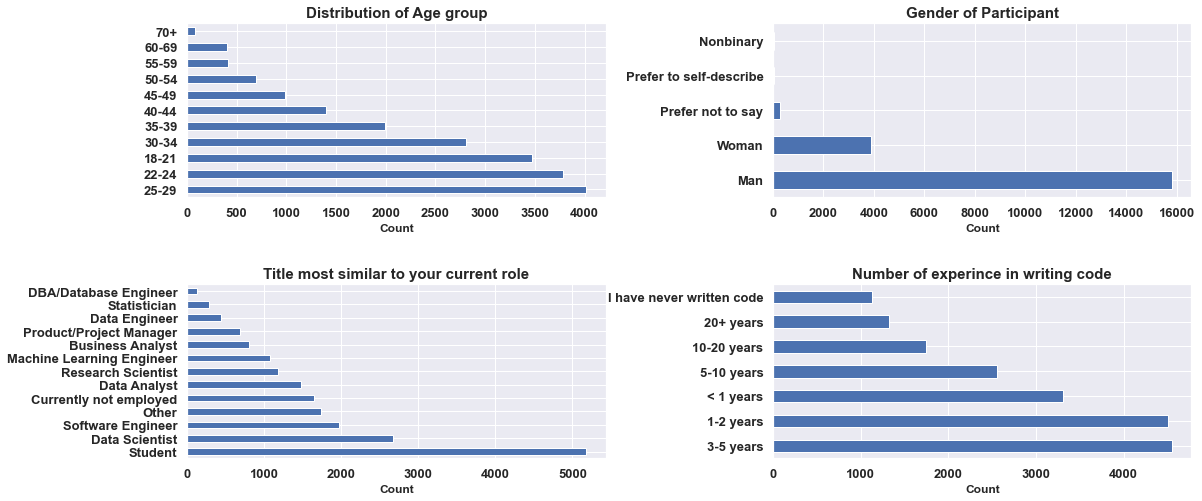

In [293]:
"""
plt.figure(figsize=(25,13))
for idx in enumerate(features):
    plt.subplot(3,2,idx[0]+1,)
    sns.countplot(x=idx[1],data=df_survey)
    plt.xticks(rotation=90)
    #plt.tight_layout()
    plt.subplots_adjust(hspace=1.8,wspace=.2)
"""
# Displaying distribution of data for columns Q1,Q2,Q5,Q6

features = ['Q1', 'Q2', 'Q5', 'Q6'] # Creating list of columns Q1,Q2,Q5,Q6
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(2,2, figsize=(18,8))
axe = ax.ravel()
for i, c in enumerate(features):
    df_survey[c].value_counts().plot(kind='barh', ax=axe[i])
    plt.subplots_adjust(wspace=.4,hspace=.5)
    axe[i].tick_params(labelsize=13,rotation=0)
    axe[i].set_xlabel('Count',fontweight="bold")
    axe[0].set_title("Distribution of Age group",fontsize=15,fontweight="bold")
    axe[1].set_title("Gender of Participant",fontsize=15,fontweight="bold")
    axe[2].set_title("Title most similar to your current role",fontsize=15,fontweight="bold")
    axe[3].set_title("Number of experince in writing code",fontsize=15,fontweight="bold")

Analysis for each columns below:

columns Q1: Highest number of the participant are in age group of 25-29, followed by 22-24. We can see here that around 3000 participant in age group of 18-21, which indicate that student who are in their 1st year of undergrad are also on kaggle platform.

Column Q2: Most of the participant are Men and there are very few woman. It indicate that there is a huge gender gap in data science community.

Column Q5: It shows there are large number of user on kaggle are students, who are learning and participating in kaggle learning and in competitions.

Column Q6: Looks most of people who are in data science role have around 1 to 5 years of coding experience. Even there are group who have very high number of coding experince. Whereas there are people who have no prior experience in coding.


In [289]:
# Creating distribution of question Q7:  "What programming languages do you use on a regular basis?"

# Creating list of individual columns where responses to this multiple selection questions were recorded.
features_Q7 = ['Q7_Part_1','Q7_Part_2','Q7_Part_3','Q7_Part_4','Q7_Part_5','Q7_Part_6','Q7_Part_7','Q7_Part_8',
               'Q7_Part_9','Q7_Part_10','Q7_Part_11','Q7_Part_12','Q7_OTHER'] 

sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(7,2, figsize=(25,10))
axe = ax.ravel()
for i, c in enumerate(features_Q7):
    df_survey[c].value_counts().plot(kind='barh', ax=axe[i])
    plt.subplots_adjust(wspace=.4,hspace=.4)
    axe[i].tick_params(labelsize=13,rotation=0)
    axe[1].set_title("programming languages use on a regular basis",fontsize=15,fontweight="bold")
    axe[0].set_title("programming languages use on a regular basis",fontsize=15,fontweight="bold")

From above distribution, we can say python is the most popular langauge being used for data science community. Looks Julia is still far behind.

Text(0.5, 0, 'count')

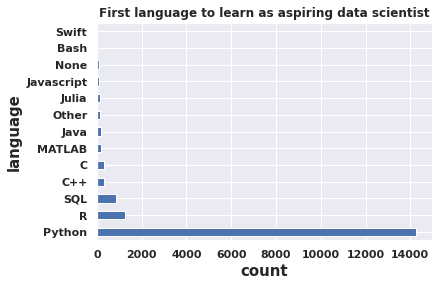

In [313]:
# Creating distribution of question Q8: "What programming language would you recommend an aspiring data scientist to learn first"

df_survey['Q8'].sort_values().value_counts().plot(kind='barh');
plt.title("First language to learn as aspiring data scientist",fontsize=12,fontweight="bold")
plt.ylabel("language",fontsize=15,fontweight="bold")
plt.xlabel("count",fontsize=15,fontweight="bold")

Python is the most recommended language in data science community. After that we have 'R', which is far behind in number

In [308]:
# Creating distribution of question Q9: "Which of the following integrated development environments (IDE's) do you use on a regular basis?"

# Creating list of individual columns where responses to this multiple selection questions were recorded.

feature_Q9 = ['Q9_Part_1','Q9_Part_2','Q9_Part_3','Q9_Part_4','Q9_Part_5','Q9_Part_6','Q9_Part_7','Q9_Part_8','Q9_Part_9',
             'Q9_Part_10','Q9_Part_11','Q9_OTHER']
fig, ax = plt.subplots(6,2, figsize=(20,20))
axe = ax.ravel()
for i, c in enumerate(feature_Q9):
    df_survey[c].value_counts().plot(kind='barh', ax=axe[i])
    plt.subplots_adjust(wspace=.4,hspace=.4)
    axe[i].tick_params(labelsize=13,rotation=50)
    axe[1].set_title("Most popular IDE's",fontsize=15,fontweight="bold")
    axe[0].set_title("Most popular IDE's",fontsize=15,fontweight="bold")

From above analysis, we can Jupyter is extensive used IDE among data science community. Surprisinly RStudio is behind Pycharm and Visual studio code IDE's.

In [309]:
# Creating distribution of question Q10: "Which of the following hosted notebook products do you use on a regular basis?"

# Creating list of individual columns where responses to this multiple selection questions were recorded.

features_Q10 = ['Q10_Part_1','Q10_Part_2','Q10_Part_3','Q10_Part_4','Q10_Part_5','Q10_Part_6','Q10_Part_7',
               'Q10_Part_8','Q10_Part_9','Q10_Part_10','Q10_Part_11','Q10_Part_12','Q10_Part_13','Q10_OTHER']
fig, ax = plt.subplots(7,2, figsize=(20,20))
axe = ax.ravel()
for i, c in enumerate(features_Q10):
    df_survey[c].value_counts().plot(kind='barh', ax=axe[i])
    plt.subplots_adjust(wspace=.4,hspace=.4)
    axe[i].tick_params(labelsize=13,rotation=50)
    axe[1].set_title("Most popular hosted notebook",fontsize=15,fontweight="bold")
    axe[0].set_title("Most popular hosted notebook",fontsize=15,fontweight="bold")

looks Kaggle and Colab are two most popular hosted Notebook among data scientist

Text(0.5, 1.0, 'Distribution of computing platform used for data science projects')

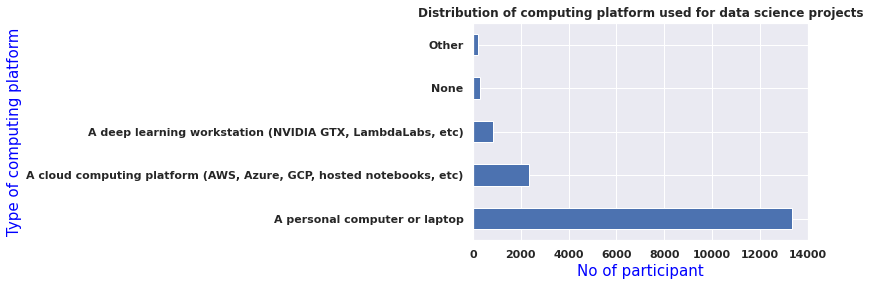

In [316]:
# Creating distribution of question Q11: "What type of computing platform do you use most often for your data science projects?"

df_survey['Q11'].value_counts().plot(kind='barh')
plt.ylabel("Type of computing platform",fontsize=15).set_color('blue')
plt.xlabel("No of participant",fontsize=15).set_color('blue')
plt.title("Distribution of computing platform used for data science projects",fontsize=12,fontweight="bold")

Looks most of the people using local machine for day to day data science

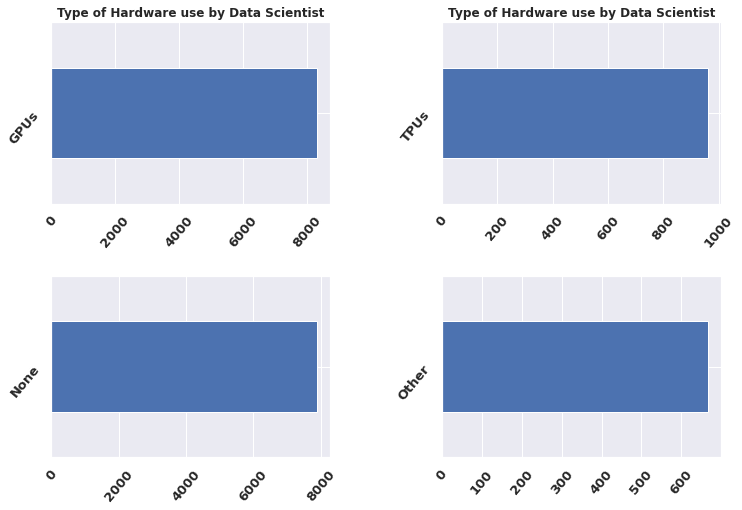

In [318]:
# Creating distribution of question Q12: "Which types of specialized hardware do you use on a regular basis?"

# Creating list of individual columns where responses to this multiple selection questions were recorded.

features_Q12 = ['Q12_Part_1','Q12_Part_2','Q12_Part_3','Q12_OTHER']
fig,ax = plt.subplots(2,2,figsize=(12,8))
axe = ax.ravel()
for i,col in enumerate(features_Q12):
    df_survey[col].value_counts().plot(kind='barh', ax=axe[i])
    plt.subplots_adjust(wspace=.4,hspace=.4)
    axe[i].tick_params(labelsize=13,rotation=50)
    axe[1].set_title("Type of Hardware use by Data Scientist",fontsize=12,fontweight="bold")
    axe[0].set_title("Type of Hardware use by Data Scientist",fontsize=12,fontweight="bold")

looks very few people use Google TPU.

In [317]:
# Creating distribution of question Q13: "Approximately how many times have you used a TPU (tensor processing unit)?"

df_survey['Q13'].value_counts().plot(kind='barh')
plt.ylabel("Number of times TPU Used",fontsize=15).set_color('blue')
plt.xlabel("Count of TPU Use",fontsize=15).set_color('blue')
plt.title("Distribution of TPU uses by participants",fontsize=12,fontweight="bold")

Text(0.5, 1.0, 'Distribution of TPU uses by participants')

It support Q12 distribution, that few people only use Google TPU

In [319]:
# Creating distribution of question Q14: "What data visualization libraries or tools do you use on a regular basis?"

# Creating list of individual columns where responses to this multiple selection questions were recorded.

features_Q14 = ['Q14_Part_1','Q14_Part_2','Q14_Part_3','Q14_Part_4','Q14_Part_5','Q14_Part_6','Q14_Part_7','Q14_Part_8',
               'Q14_Part_9','Q14_Part_10','Q14_Part_11','Q14_OTHER']
fig,ax = plt.subplots(6,2,figsize=(25,20))
axe = ax.ravel()
for i,col in enumerate(features_Q14):
    df_survey[col].value_counts().plot(kind='barh', ax=axe[i])
    plt.subplots_adjust(wspace=.4,hspace=.4)
    axe[i].tick_params(labelsize=13,rotation=40)
    axe[1].set_title("Data Visualization tool",fontsize=12,fontweight="bold")
    axe[0].set_title("Data Visualization tool",fontsize=12,fontweight="bold")

It supports Q7 analysis, where participant selected "Python" as most used language, because of that Matplotlib and Seaborn is also being used extensibely as Vizualization tool. Matplotlib and Seaborn are part of python ecosystem

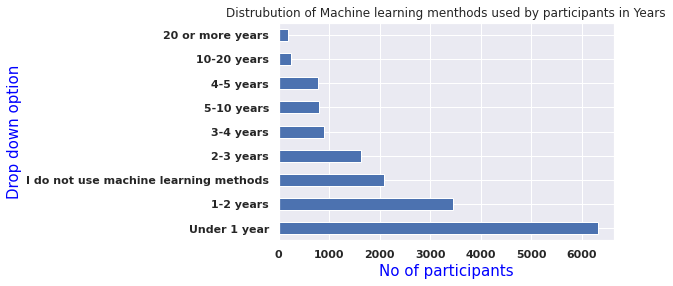

In [321]:
# Creating distribution of question Q15: "For how many years have you used machine learning methods?"

df_survey['Q15'].value_counts().plot(kind='barh')
plt.ylabel("Drop down option",fontsize=15).set_color('blue')
plt.xlabel("No of participants",fontsize=15).set_color('blue')
plt.title("Distrubution of Machine learning menthods used by participants in Years")
plt.rc('figure', titlesize=14) 

From above analysis, we can that most of people are using machine learning from last 5 years. There are few people who are using machine laerning from more than 5 years

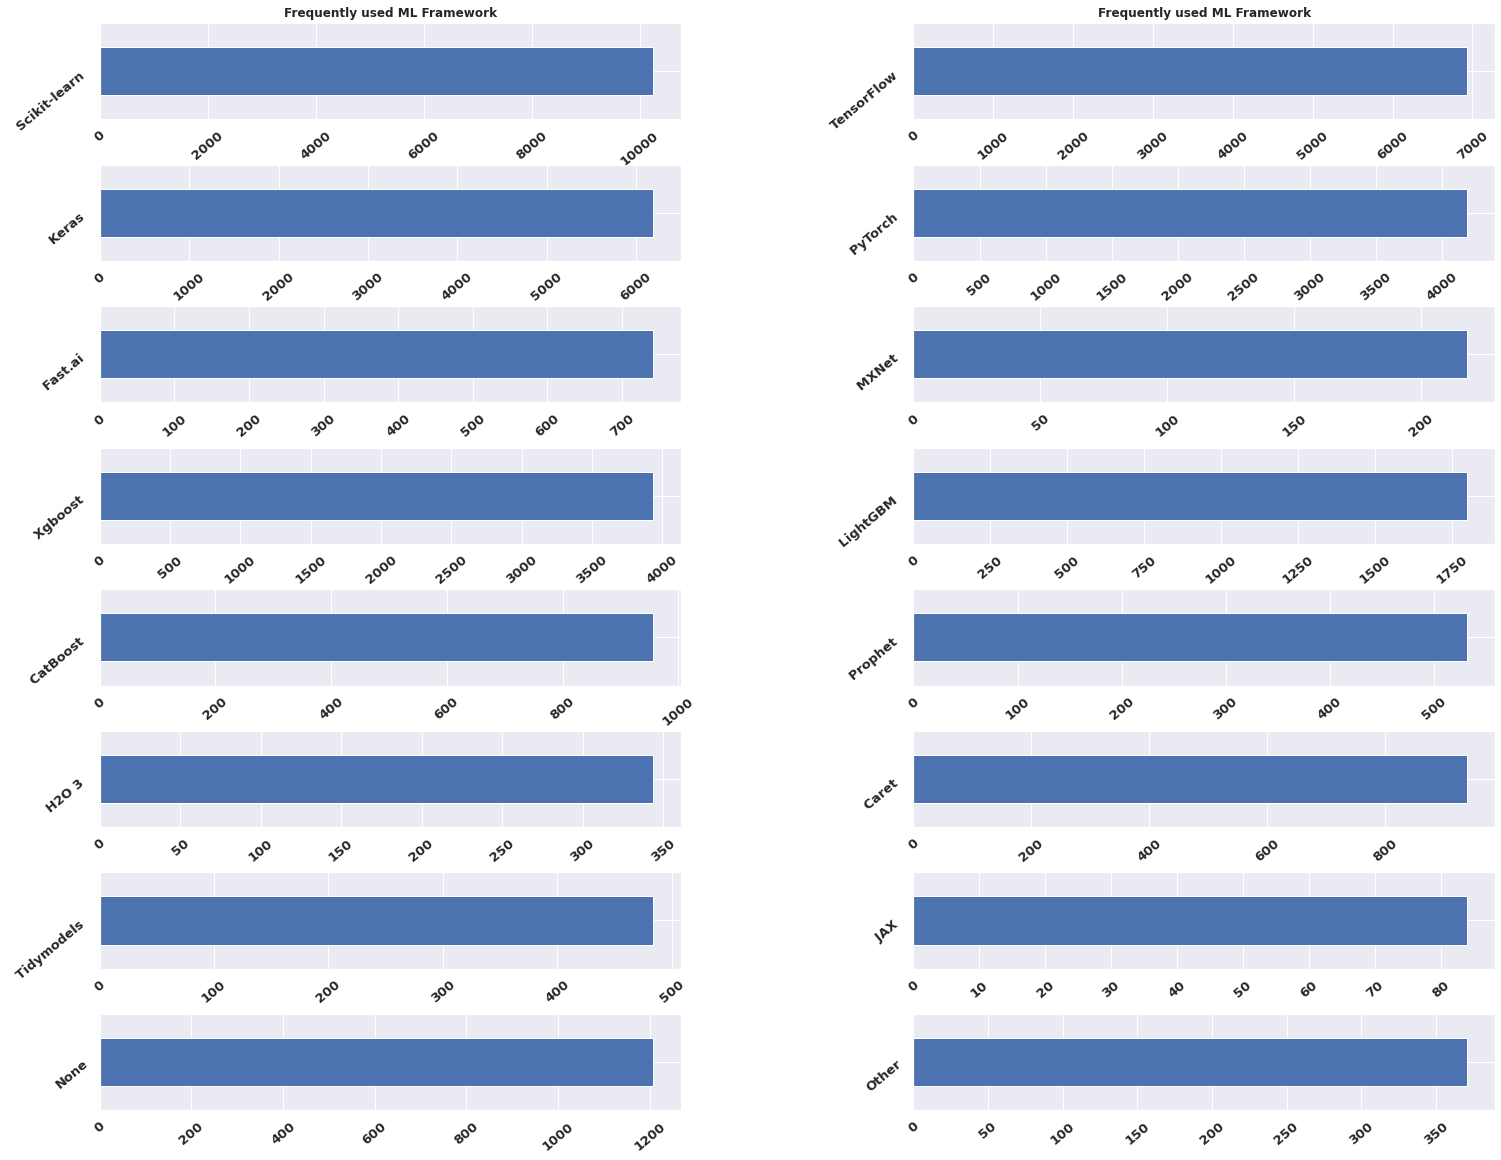

In [322]:
# Creating distribution of question Q16: "Which of the following machine learning frameworks do you use on a regular basis?"

# Creating list of individual columns where responses to this multiple selection questions were recorded.

features_Q16 = ['Q16_Part_1','Q16_Part_2','Q16_Part_3','Q16_Part_4','Q16_Part_5','Q16_Part_6','Q16_Part_7','Q16_Part_8',
               'Q16_Part_9','Q16_Part_10','Q16_Part_11','Q16_Part_12','Q16_Part_13','Q16_Part_14','Q16_Part_15','Q16_OTHER']
fig,ax = plt.subplots(8,2,figsize=(25,20))
axe = ax.ravel()
for i,col in enumerate(features_Q16):
    df_survey[col].value_counts().plot(kind='barh', ax=axe[i])
    plt.subplots_adjust(wspace=.4,hspace=.47)
    axe[i].tick_params(labelsize=13,rotation=40)
    axe[1].set_title("Frequently used ML Framework",fontsize=12,fontweight="bold")
    axe[0].set_title("Frequently used ML Framework",fontsize=12,fontweight="bold")

As most of people use python for ML work, that why Scikit-Learn, TensorFlow, Keras and PyTorch ruling this chart.

In [323]:
# Creating distribution of question Q17: "Which of the following ML algorithms do you use on a regular basis?"

# Creating list of individual columns where responses to this multiple selection questions were recorded.

features_Q17 = ['Q17_Part_1','Q17_Part_2','Q17_Part_3','Q17_Part_4','Q17_Part_5','Q17_Part_6','Q17_Part_7','Q17_Part_8',
               'Q17_Part_9','Q17_Part_10','Q17_Part_11','Q17_OTHER']
fig,ax = plt.subplots(6,2,figsize=(25,20))
axe = ax.ravel()
for i,col in enumerate(features_Q17):
    df_survey[col].value_counts().plot(kind='barh', ax=axe[i])
    plt.subplots_adjust(wspace=.4,hspace=.47)
    axe[i].tick_params(labelsize=13,rotation=50)
    axe[1].set_title("Frequently used ML Algorithms",fontsize=12,fontweight="bold")
    axe[0].set_title("Frequently used ML Algorithms",fontsize=12,fontweight="bold")

`From above analysis it looks that most of the problem we can solve using classical Machine learning approach. Deep learning still far behind in common uses.`

In [326]:
# Creating distribution of question Q18: "Which categories of computer vision methods do you use on a regular basis?"
# This is question was only asked to respondents that selected the relevant answer choices for Question 17
# Creating list of individual columns where responses to this multiple selection questions were recorded.

features_Q18 = ['Q18_Part_1','Q18_Part_2','Q18_Part_3','Q18_Part_4','Q18_Part_5','Q18_Part_6','Q18_OTHER']
fig,ax = plt.subplots(4,2,figsize=(25,20))
axe = ax.ravel()
for i,col in enumerate(features_Q18):
    df_survey[col].value_counts().plot(kind='barh', ax=axe[i])
    plt.subplots_adjust(wspace=.4,hspace=.47)
    axe[i].tick_params(labelsize=13,rotation=80)
    axe[1].set_title("Type of computer vision used",fontsize=12,fontweight="bold")
    axe[0].set_title("Type of computer vision used",fontsize=12,fontweight="bold")

Most of people using General purpose Image classification methods

In [327]:
# Creating distribution of question Q19: "Which of the following natural language processing (NLP) methods do you use on a regular basis?"
# This is question was only asked to respondents that selected the relevant answer choices for Question 17
# Creating list of individual columns where responses to this multiple selection questions were recorded.

features_Q19 = ['Q19_Part_1','Q19_Part_2','Q19_Part_3','Q19_Part_4','Q19_Part_5','Q18_OTHER']
fig,ax = plt.subplots(3,2,figsize=(25,20))
axe = ax.ravel()
for i,col in enumerate(features_Q19):
    df_survey[col].value_counts().plot(kind='barh', ax=axe[i])
    plt.subplots_adjust(wspace=.4,hspace=.47)
    axe[i].tick_params(labelsize=13,rotation=60)
    axe[1].set_title("NLP Used on regular basis",fontsize=12,fontweight="bold")
    axe[0].set_title("NLP Used on regular basis",fontsize=12,fontweight="bold")

Most of people using word vector technique for NLP work. Very few using BERT or GPT-3

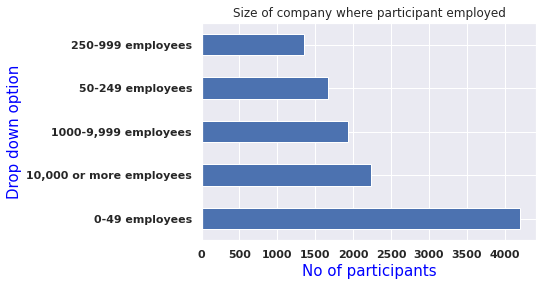

In [328]:
# Creating distribution of question Q20: "What is the size of the company where you are employed?"

df_survey['Q20'].value_counts().plot(kind='barh')
plt.ylabel("Drop down option",fontsize=15).set_color('blue')
plt.xlabel("No of participants",fontsize=15).set_color('blue')
plt.title("Size of company where participant employed")
plt.rc('figure', titlesize=14) 

Looks there are many startup are coming in ML work

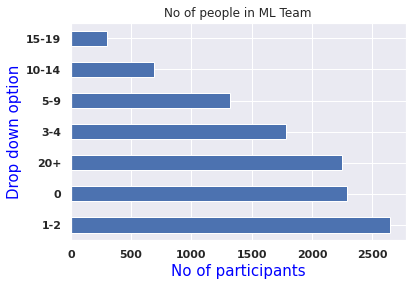

In [329]:
# Creating distribution of question Q21: "Approximately how many individuals are responsible for data science workloads at your place of
#business?"

df_survey['Q21'].value_counts().plot(kind='barh')
plt.ylabel("Drop down option",fontsize=15).set_color('blue')
plt.xlabel("No of participants",fontsize=15).set_color('blue')
plt.title("No of people in ML Team")
plt.rc('figure', titlesize=14) 

It suffice the distribution of Q20, we can see that most of organization have small ML team.

In [330]:
# Creating distribution of question Q22: "Does your current employer incorporate machine learning methods into their business?" 

df_survey['Q22'].value_counts().plot(kind='barh')
plt.ylabel("Drop down option",fontsize=15).set_color('blue')
plt.xlabel("No of participants",fontsize=15).set_color('blue')
plt.title("ML incoporation in business problem")
plt.rc('figure', titlesize=14) 

`We can still most of organization are in nascent stage in term of ML uses`

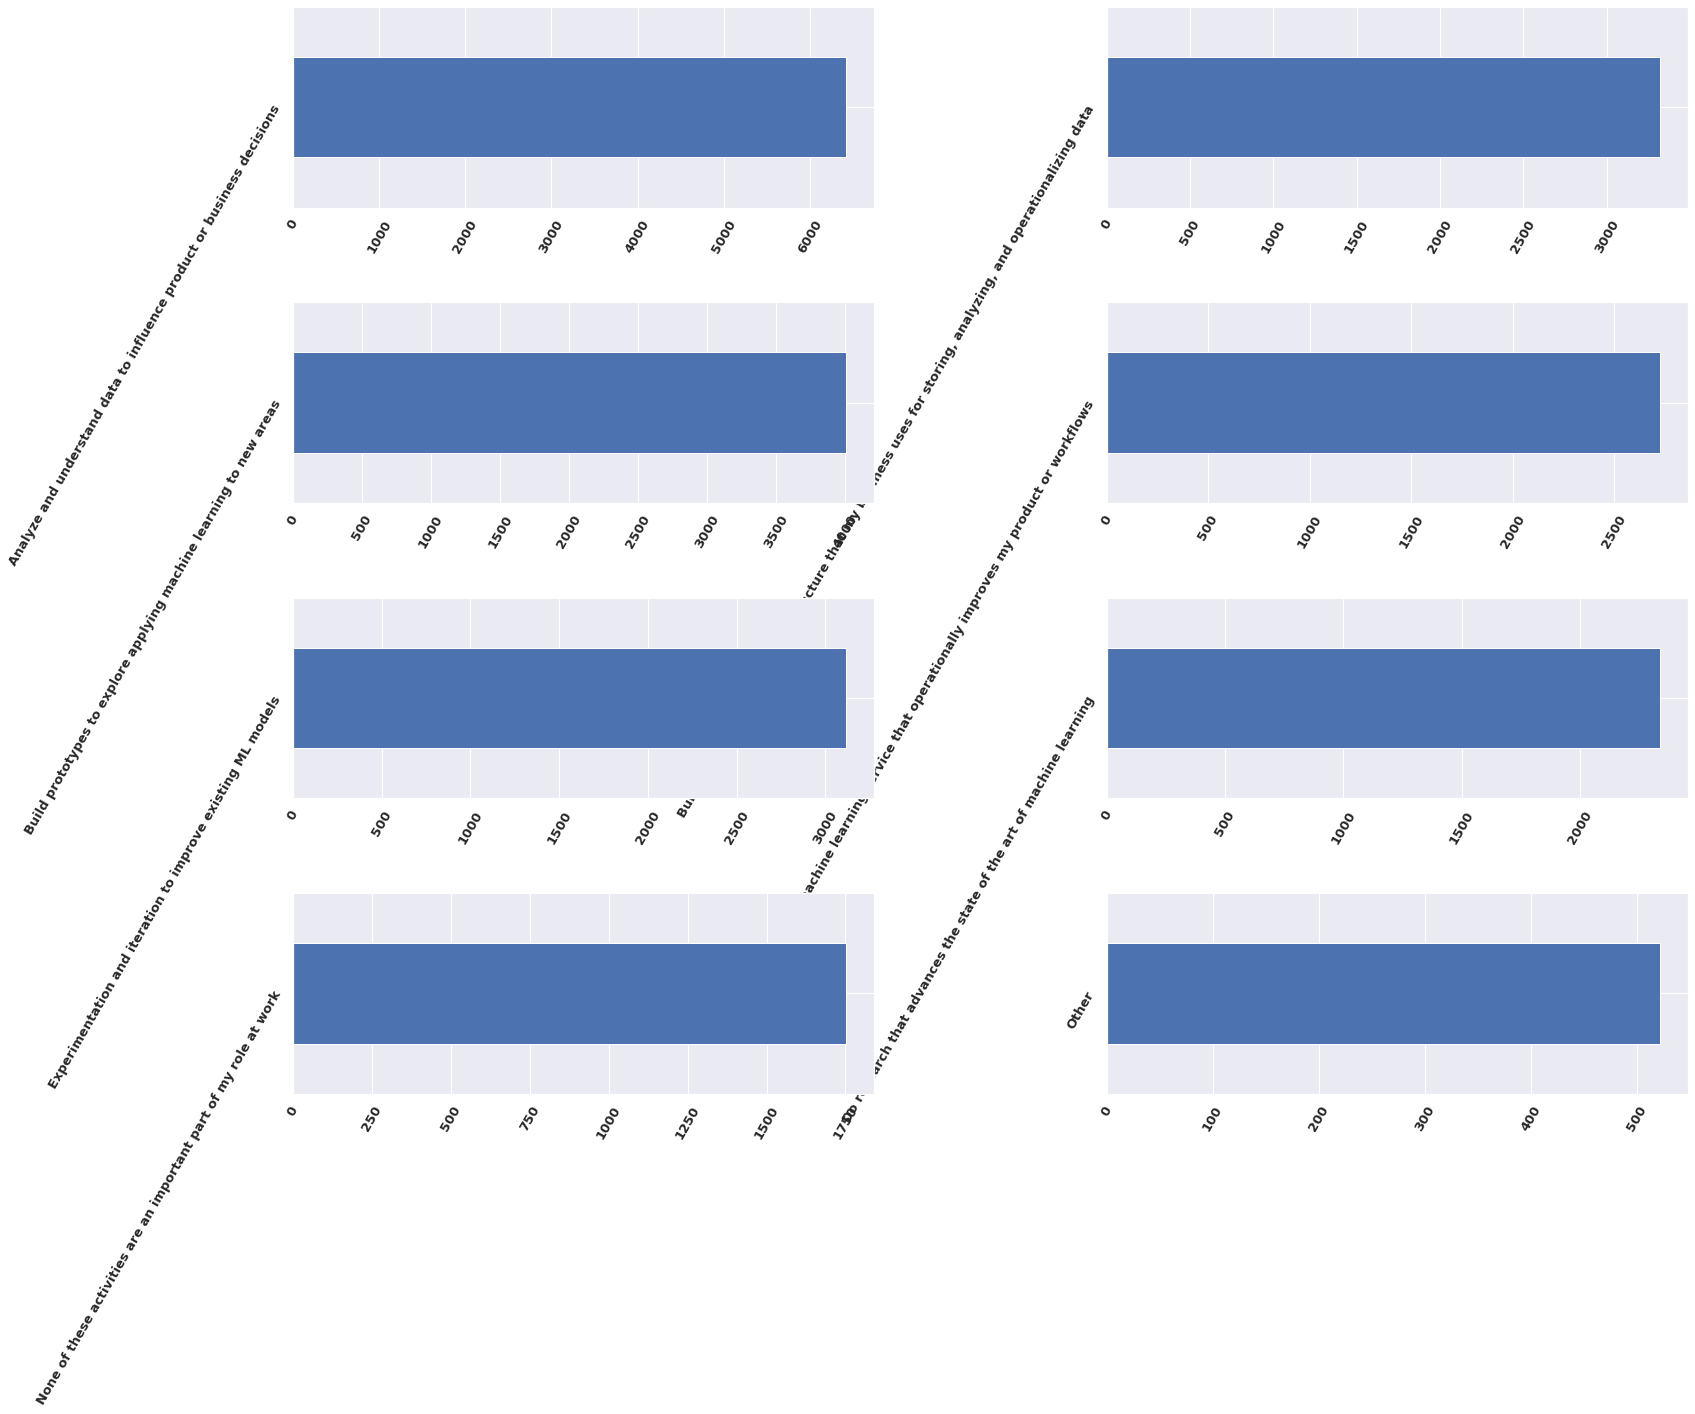

In [194]:
# Creating distribution of question Q23: "Select any activities that make up an important part of your role at work?"

# Creating list of individual columns where responses to this multiple selection questions were recorded.

features_Q23 = ['Q23_Part_1','Q23_Part_2','Q23_Part_3','Q23_Part_4','Q23_Part_5','Q23_Part_6','Q23_Part_7','Q23_OTHER']
fig,ax = plt.subplots(4,2,figsize=(25,20))
axe = ax.ravel()
for i,col in enumerate(features_Q23):
    df_survey[col].value_counts().plot(kind='barh', ax=axe[i])
    plt.subplots_adjust(wspace=.4,hspace=.47)
    axe[i].tick_params(labelsize=13,rotation=60)

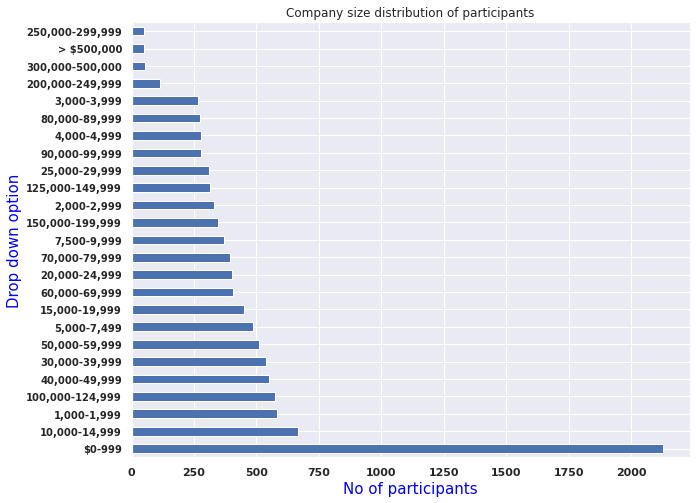

In [197]:
# Creating distribution of question Q24: "What is your current yearly compensation ( approximate $USD )? 

plt.figure(figsize=(10,8))
df_survey['Q24'].value_counts().plot(kind='barh')
plt.ylabel("Drop down option",fontsize=15).set_color('blue')
plt.xlabel("No of participants",fontsize=15).set_color('blue')
plt.title("Salary distribution of participants")
plt.rc('figure', titlesize=14) 

From the data it looks data scientist pay is on lower side. But If see the participant region, a large chunk is from India. As of now USD and INR conversant rate is high, because of that when INR salary will be converted into USD, it will be on lower bracket.

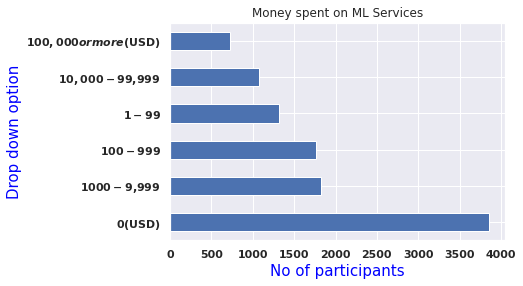

In [331]:
#Creating distribution of question Q24:  Approximately how much money have you (or your team) spent on machine learning 
#and/or cloud computing services at home (or at work) in the past 5 years ( approximate $USD )

df_survey['Q25'].value_counts().plot(kind='barh')
plt.ylabel("Drop down option",fontsize=15).set_color('blue')
plt.xlabel("No of participants",fontsize=15).set_color('blue')
plt.title("Money spent on ML Services")
plt.rc('figure', titlesize=14) 

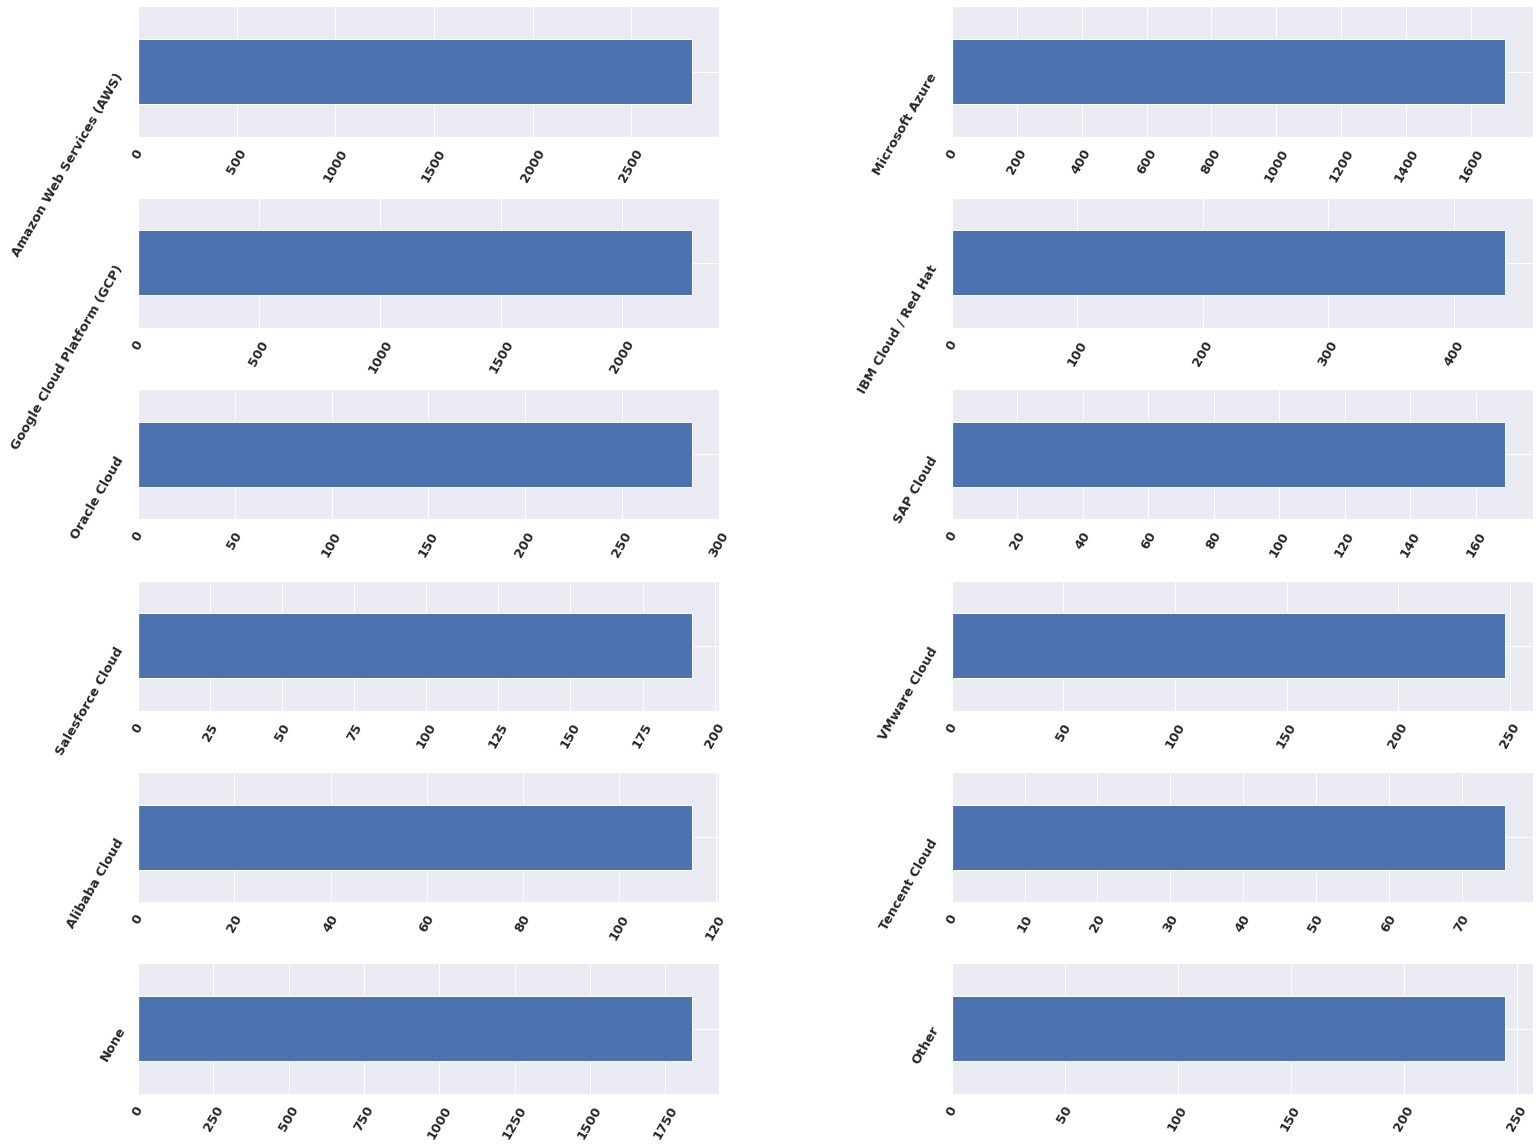

In [206]:
# Creating distribution of question Q26_A: "Which of the following cloud computing platforms do you use on a regular basis"?

# Creating list of individual columns where responses to this multiple selection questions were recorded.

features_Q26_A = ['Q26_A_Part_1','Q26_A_Part_2','Q26_A_Part_3','Q26_A_Part_4','Q26_A_Part_5','Q26_A_Part_6','Q26_A_Part_7',
                'Q26_A_Part_8','Q26_A_Part_9','Q26_A_Part_10','Q26_A_Part_11','Q26_A_OTHER']
fig,ax = plt.subplots(6,2,figsize=(25,20))
axe = ax.ravel()
for i,col in enumerate(features_Q26_A):
    df_survey[col].value_counts().plot(kind='barh', ax=axe[i])
    plt.subplots_adjust(wspace=.4,hspace=.47)
    axe[i].tick_params(labelsize=13,rotation=60)

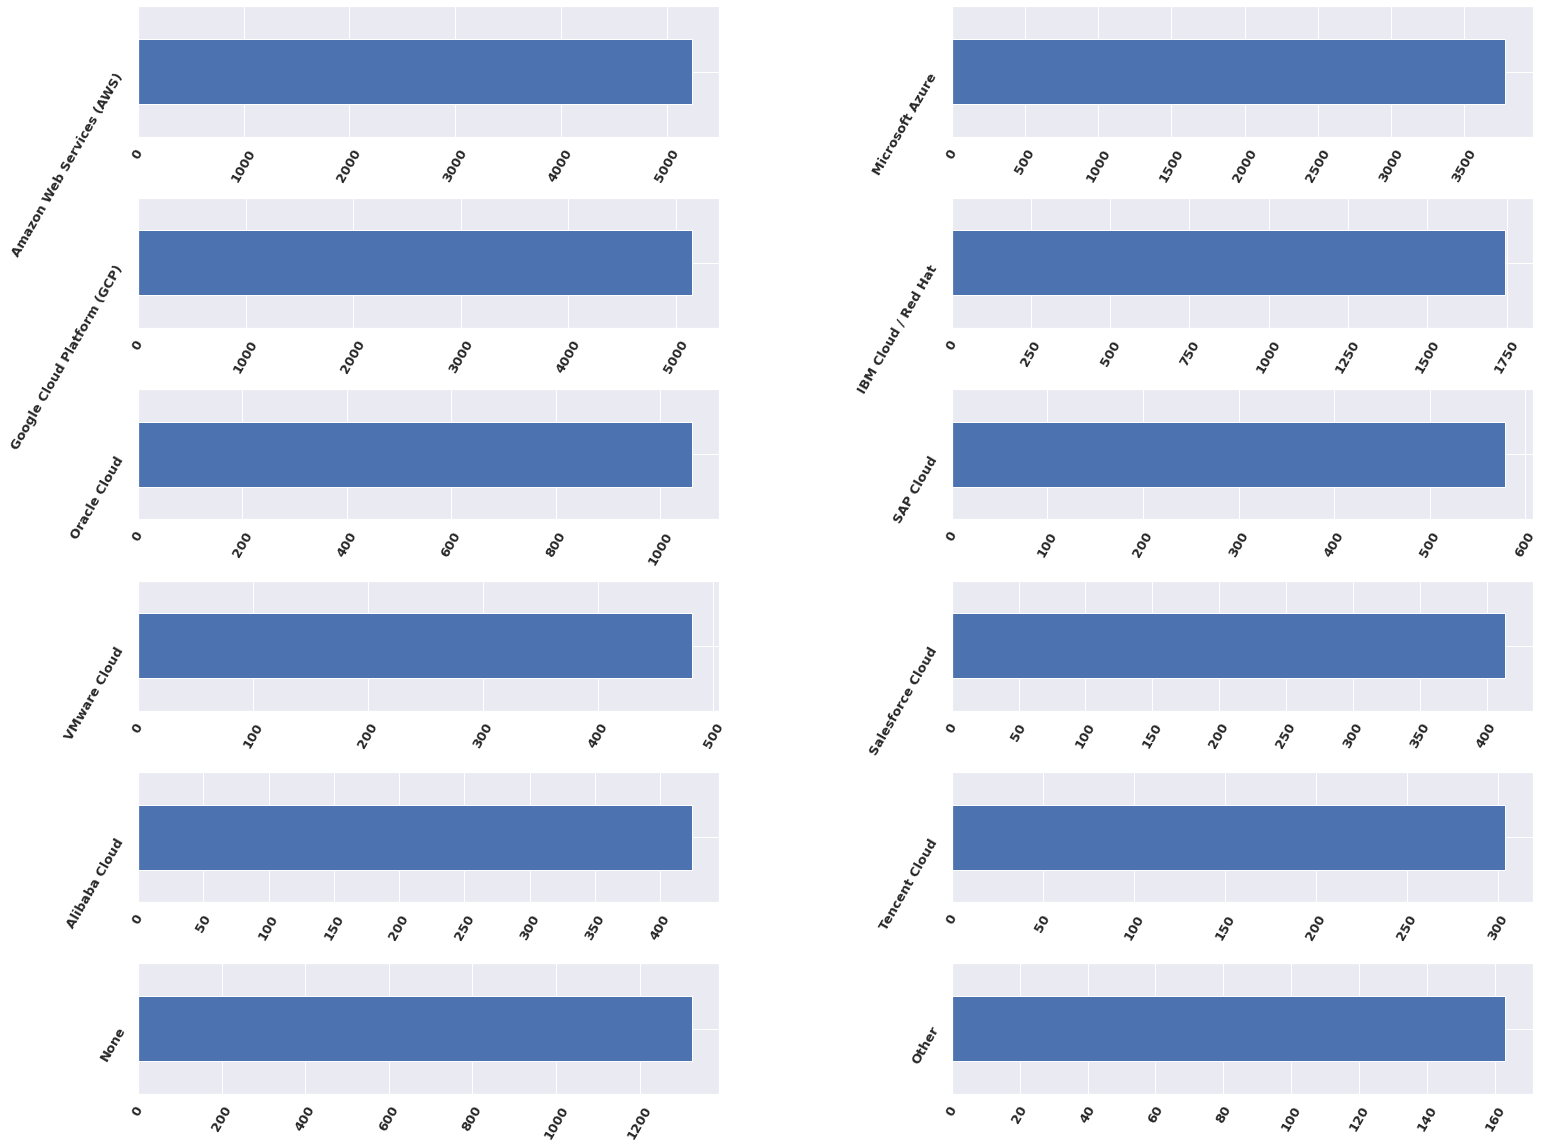

In [207]:
# Creating distribution of question Q26_B: "Which of the following cloud computing platforms do you hope to become more familiar with in the next 2 years"?

# Creating list of individual columns where responses to this multiple selection questions were recorded.

features_Q26_B = ['Q26_B_Part_1','Q26_B_Part_2','Q26_B_Part_3','Q26_B_Part_4','Q26_B_Part_5','Q26_B_Part_6','Q26_B_Part_7',
                'Q26_B_Part_8','Q26_B_Part_9','Q26_B_Part_10','Q26_B_Part_11','Q26_B_OTHER']
fig,ax = plt.subplots(6,2,figsize=(25,20))
axe = ax.ravel()
for i,col in enumerate(features_Q26_B):
    df_survey[col].value_counts().plot(kind='barh', ax=axe[i])
    plt.subplots_adjust(wspace=.4,hspace=.47)
    axe[i].tick_params(labelsize=13,rotation=60)

In [208]:
# Creating distribution of question Q27_A: "Do you use any of the following cloud computing products on a regular basis"?
# This is question was only asked to respondents that selected the relevant answer choices for Question 26-A
# Creating list of individual columns where responses to this multiple selection questions were recorded.

features_Q27_A = ['Q27_A_Part_1','Q27_A_Part_2','Q27_A_Part_3','Q27_A_Part_4','Q27_A_Part_5','Q27_A_Part_6','Q27_A_Part_7',
                'Q27_A_Part_8','Q27_A_Part_9','Q27_A_Part_10','Q27_A_Part_11','Q27_A_OTHER']
fig,ax = plt.subplots(6,2,figsize=(25,20))
axe = ax.ravel()
for i,col in enumerate(features_Q27_A):
    df_survey[col].value_counts().plot(kind='barh', ax=axe[i])
    plt.subplots_adjust(wspace=.4,hspace=.47)
    axe[i].tick_params(labelsize=13,rotation=60)

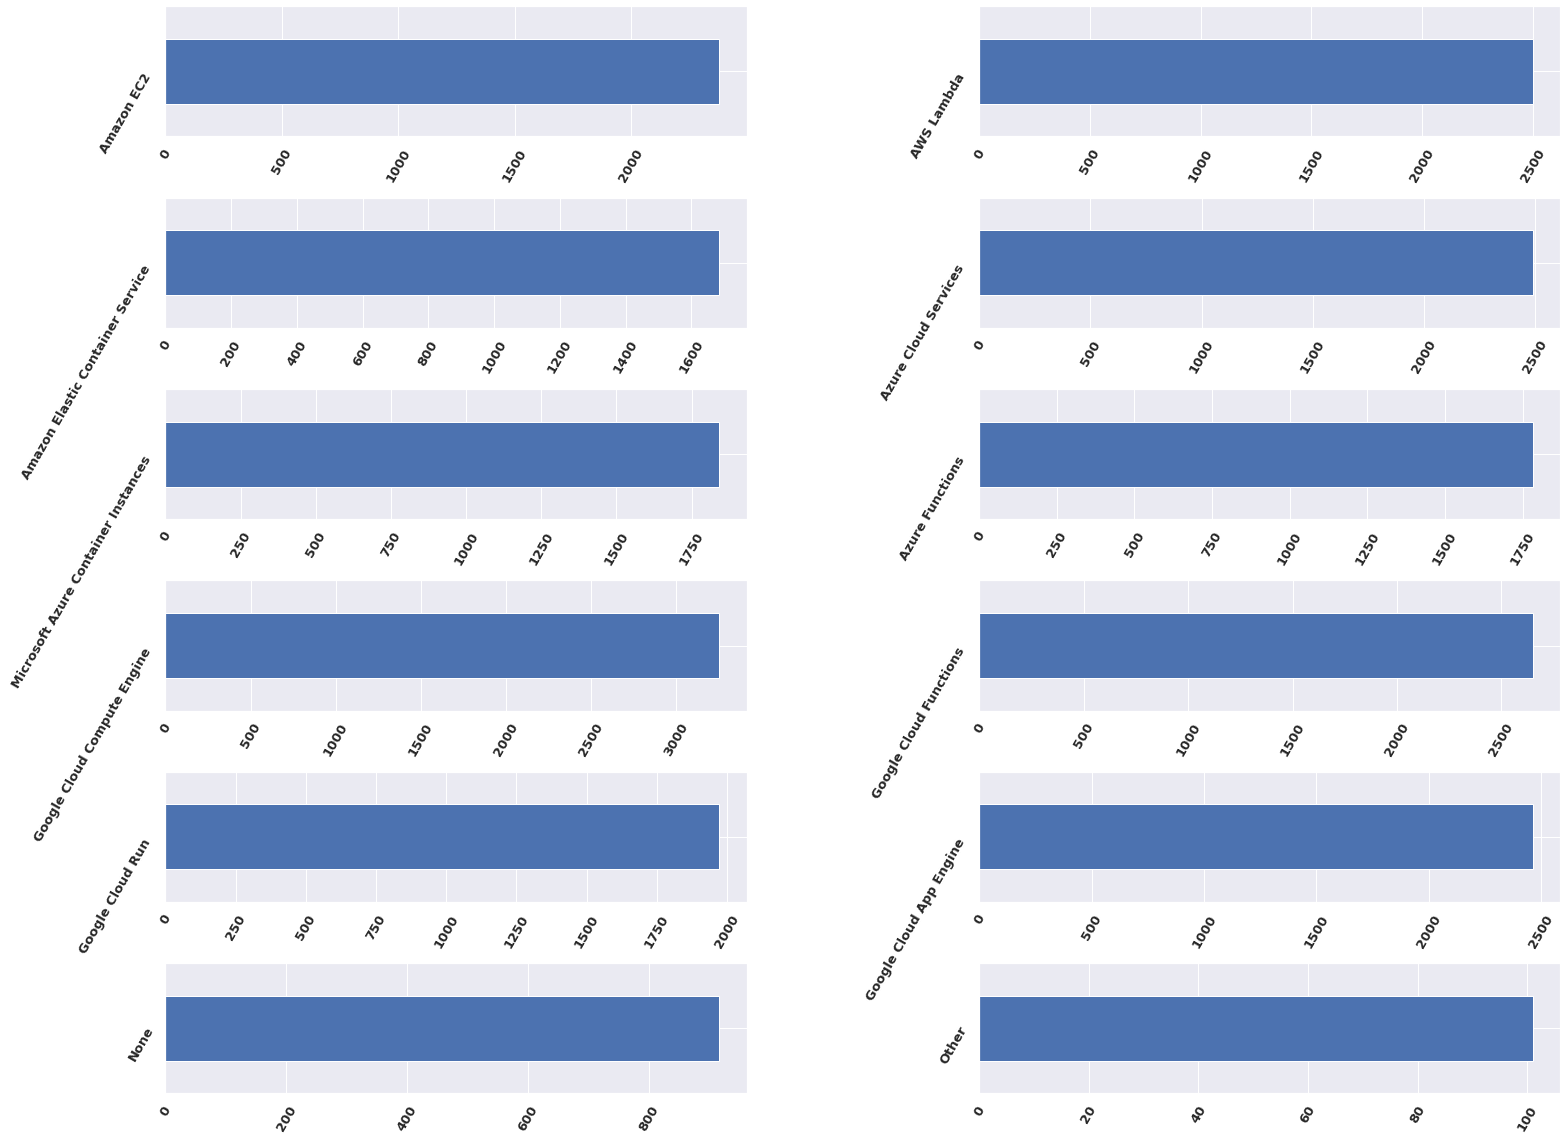

In [209]:
# Creating distribution of question Q27_B: "In the next 2 years, do you hope to become more familiar with any of these specific cloud computing products"?

# Creating list of individual columns where responses to this multiple selection questions were recorded.

features_Q27_B = ['Q27_B_Part_1','Q27_B_Part_2','Q27_B_Part_3','Q27_B_Part_4','Q27_B_Part_5','Q27_B_Part_6','Q27_B_Part_7',
                'Q27_B_Part_8','Q27_B_Part_9','Q27_B_Part_10','Q27_B_Part_11','Q27_B_OTHER']
fig,ax = plt.subplots(6,2,figsize=(25,20))
axe = ax.ravel()
for i,col in enumerate(features_Q27_B):
    df_survey[col].value_counts().plot(kind='barh', ax=axe[i])
    plt.subplots_adjust(wspace=.4,hspace=.47)
    axe[i].tick_params(labelsize=13,rotation=60)

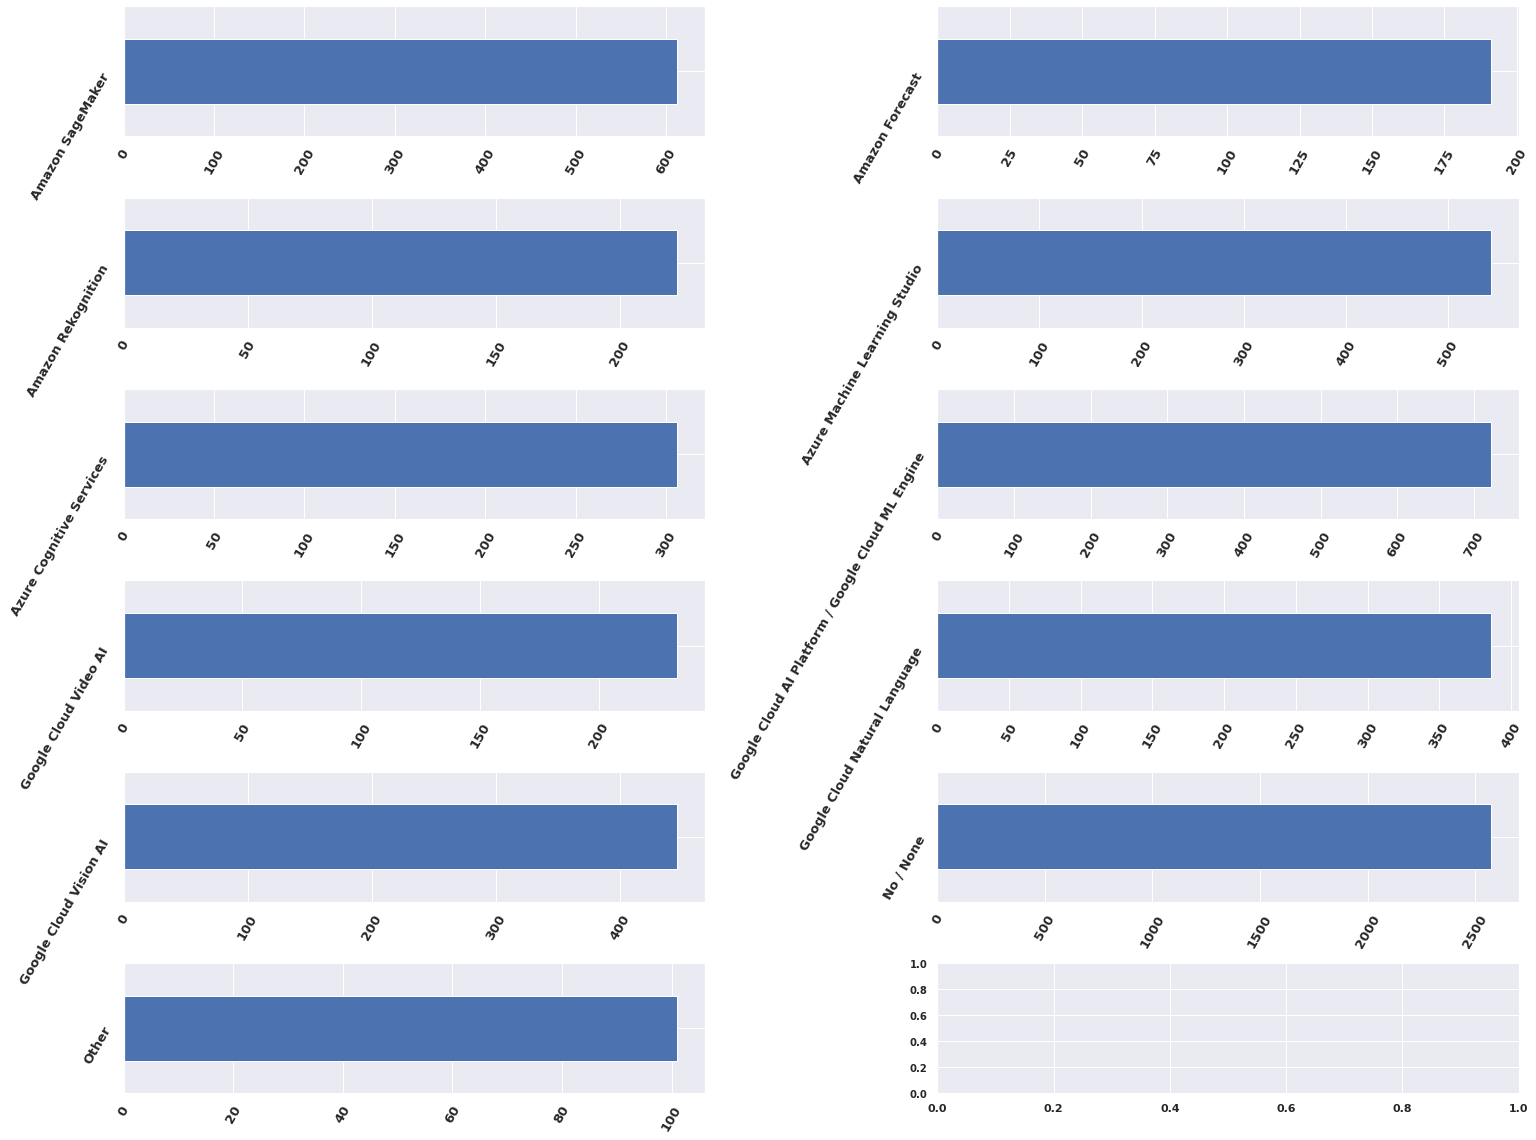

In [211]:
# Creating distribution of question Q28_A: "Do you use any of the following machine learning products on a regular basis"?
# This is question was only asked to respondents that selected the relevant answer choices for Question 26-A
# Creating list of individual columns where responses to this multiple selection questions were recorded.

features_Q28_A = ['Q28_A_Part_1','Q28_A_Part_2','Q28_A_Part_3','Q28_A_Part_4','Q28_A_Part_5','Q28_A_Part_6','Q28_A_Part_7',
                'Q28_A_Part_8','Q28_A_Part_9','Q28_A_Part_10','Q28_A_OTHER']
fig,ax = plt.subplots(6,2,figsize=(25,20))
axe = ax.ravel()
for i,col in enumerate(features_Q28_A):
    df_survey[col].value_counts().plot(kind='barh', ax=axe[i])
    plt.subplots_adjust(wspace=.4,hspace=.47)
    axe[i].tick_params(labelsize=13,rotation=60)

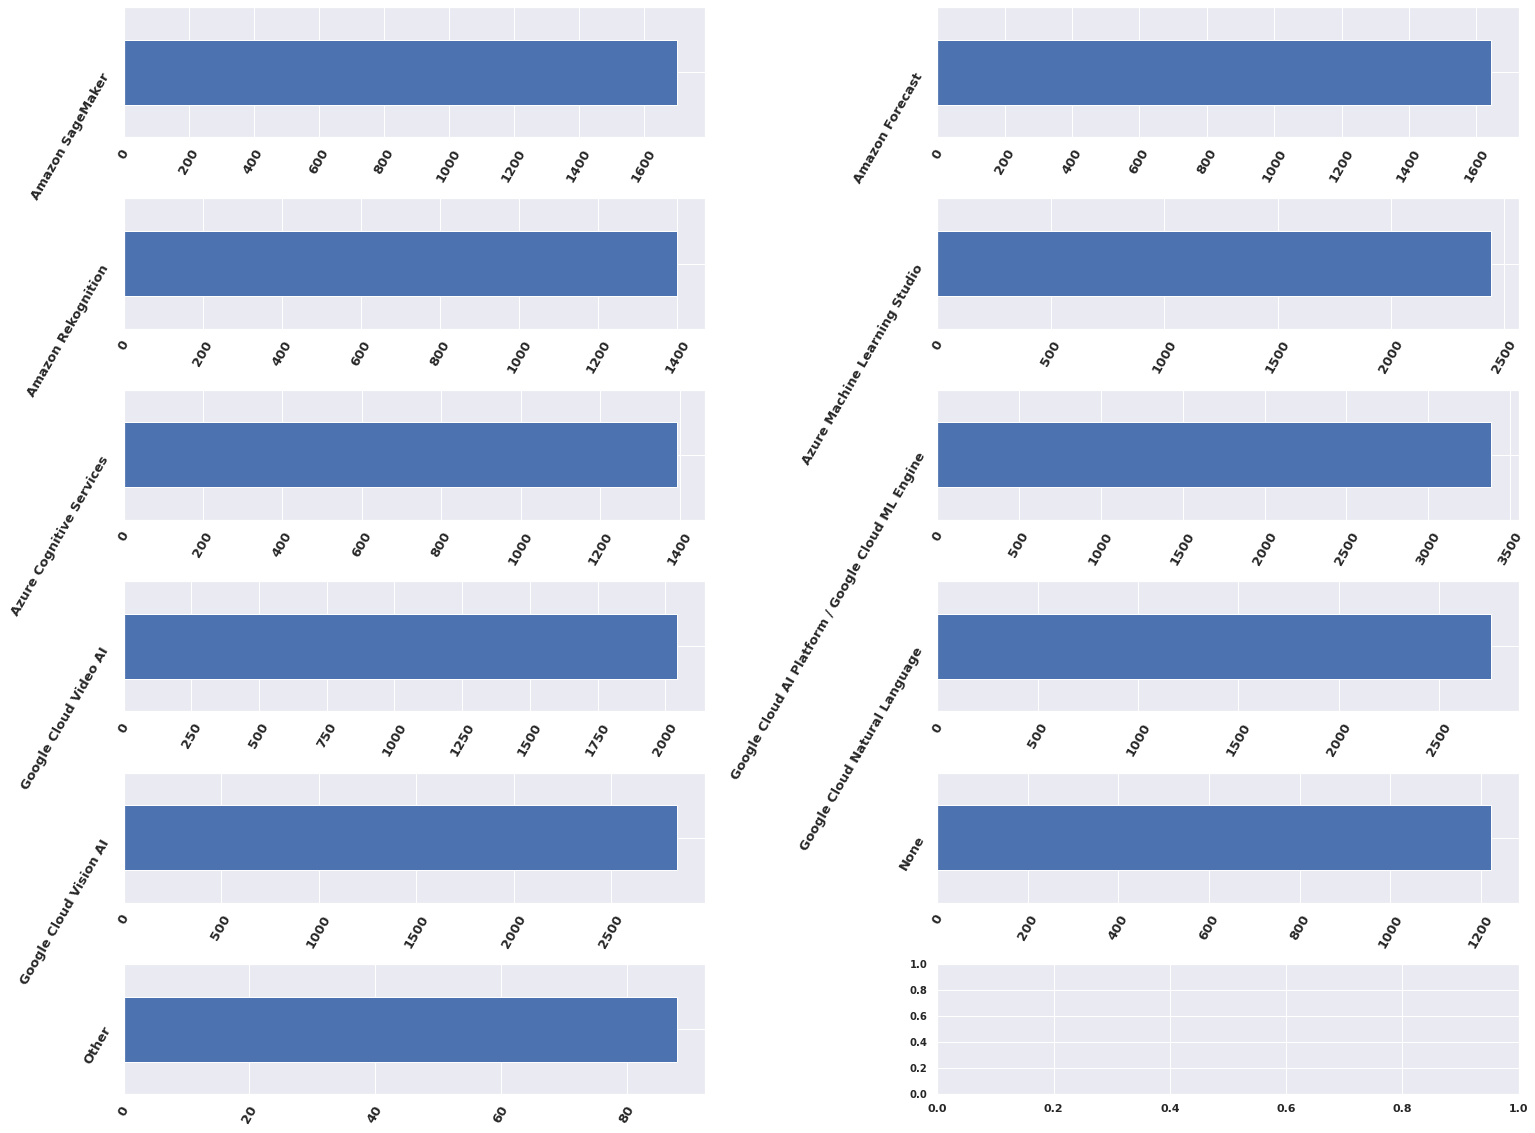

In [212]:
# Creating distribution of question Q28_B: "In the next 2 years, do you hope to become more familiar with any of these specific machine learning products"?

# Creating list of individual columns where responses to this multiple selection questions were recorded.


features_Q28_B = ['Q28_B_Part_1','Q28_B_Part_2','Q28_B_Part_3','Q28_B_Part_4','Q28_B_Part_5','Q28_B_Part_6','Q28_B_Part_7',
                'Q28_B_Part_8','Q28_B_Part_9','Q28_B_Part_10','Q28_B_OTHER']
fig,ax = plt.subplots(6,2,figsize=(25,20))
axe = ax.ravel()
for i,col in enumerate(features_Q28_B):
    df_survey[col].value_counts().plot(kind='barh', ax=axe[i])
    plt.subplots_adjust(wspace=.4,hspace=.47)
    axe[i].tick_params(labelsize=13,rotation=60)

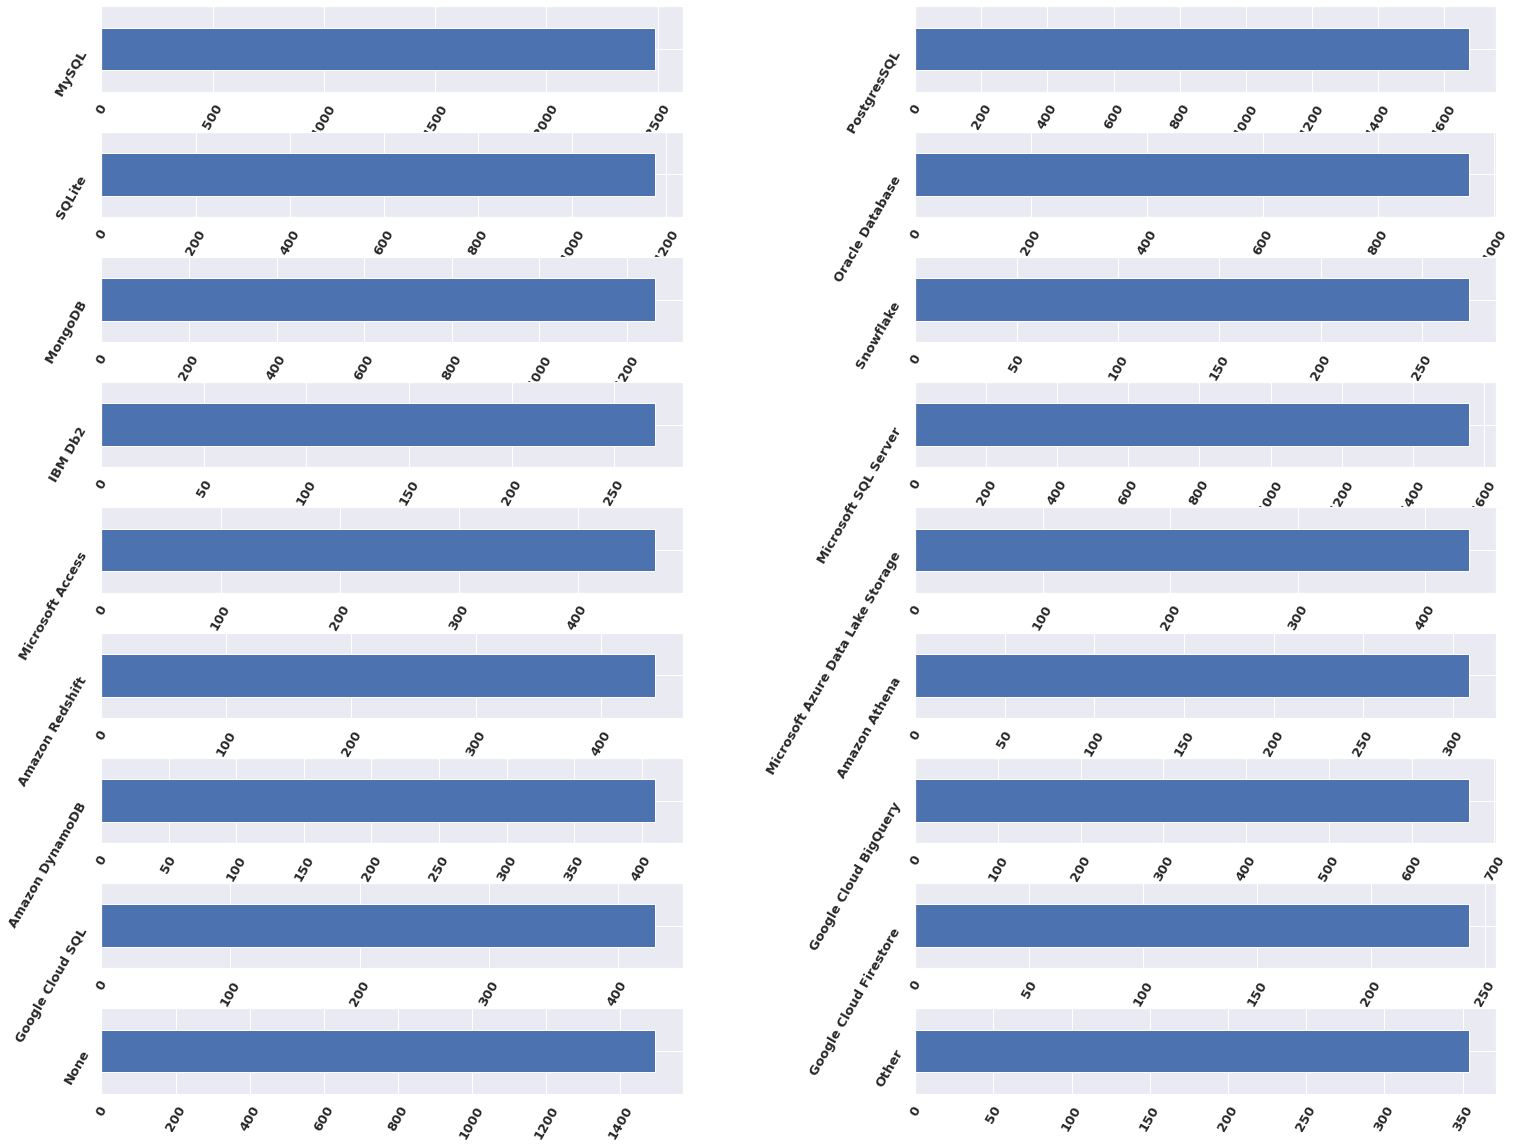

In [213]:
# Creating distribution of question Q29_A: "Which of the following big data products (relational databases, data warehouses, data lakes, or
# similar) do you use on a regular basis"?

# Creating list of individual columns where responses to this multiple selection questions were recorded.


features_Q29_A = ['Q29_A_Part_1','Q29_A_Part_2','Q29_A_Part_3','Q29_A_Part_4','Q29_A_Part_5','Q29_A_Part_6','Q29_A_Part_7',
                'Q29_A_Part_8','Q29_A_Part_9','Q29_A_Part_10','Q29_A_Part_11','Q29_A_Part_12','Q29_A_Part_13','Q29_A_Part_14',
                  'Q29_A_Part_15','Q29_A_Part_16','Q29_A_Part_17','Q29_A_OTHER']
fig,ax = plt.subplots(9,2,figsize=(25,20))
axe = ax.ravel()
for i,col in enumerate(features_Q29_A):
    df_survey[col].value_counts().plot(kind='barh', ax=axe[i])
    plt.subplots_adjust(wspace=.4,hspace=.47)
    axe[i].tick_params(labelsize=13,rotation=60)

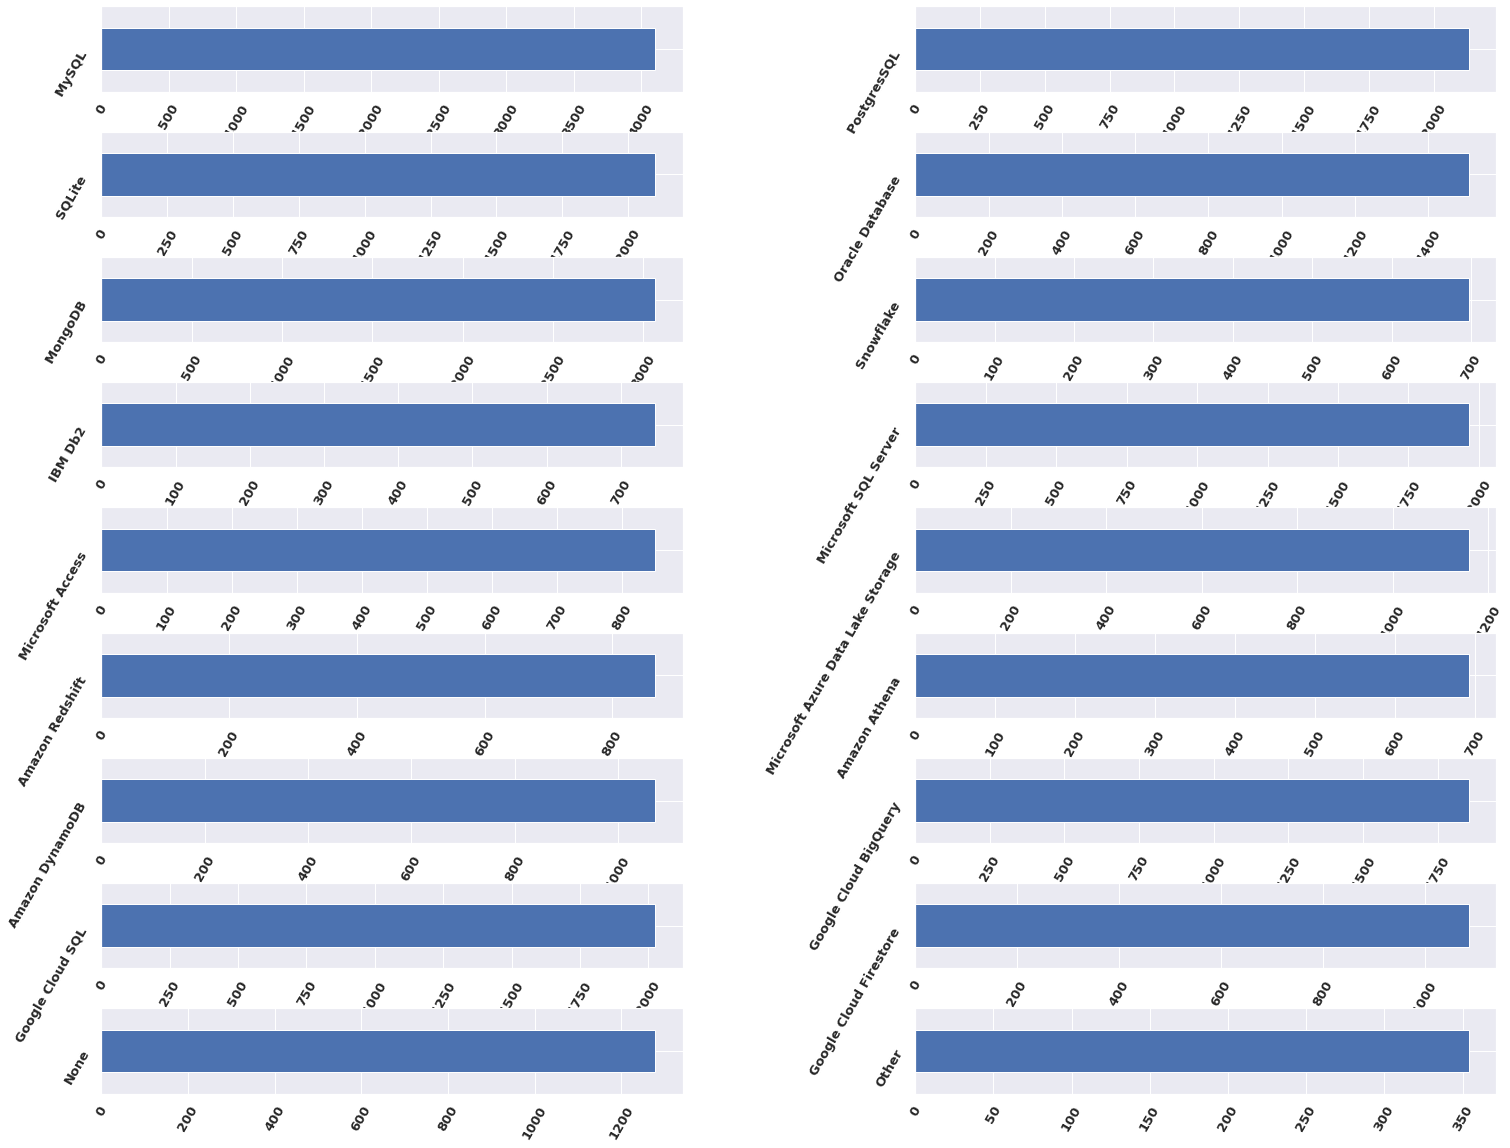

In [214]:
# Creating distribution of question Q29_B: "Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you hope to become more familiar with in the next 2 years"?

# Creating list of individual columns where responses to this multiple selection questions were recorded.


features_Q29_B = ['Q29_B_Part_1','Q29_B_Part_2','Q29_B_Part_3','Q29_B_Part_4','Q29_B_Part_5','Q29_B_Part_6','Q29_B_Part_7',
                'Q29_B_Part_8','Q29_B_Part_9','Q29_B_Part_10','Q29_B_Part_11','Q29_B_Part_12','Q29_B_Part_13','Q29_B_Part_14',
                  'Q29_B_Part_15','Q29_B_Part_16','Q29_B_Part_17','Q29_A_OTHER']
fig,ax = plt.subplots(9,2,figsize=(25,20))
axe = ax.ravel()
for i,col in enumerate(features_Q29_B):
    df_survey[col].value_counts().plot(kind='barh', ax=axe[i])
    plt.subplots_adjust(wspace=.4,hspace=.47)
    axe[i].tick_params(labelsize=13,rotation=60)

In [332]:
#Creating distribution of question Q30: "Which of the following big data products (relational database, data warehouse, data lake, or similar)
# do you use most often"  
# This question was only asked to selected more than one choice for Question 29-A
df_survey['Q30'].value_counts().plot(kind='barh')
plt.ylabel("Drop down option",fontsize=15).set_color('blue')
plt.xlabel("No of participants",fontsize=15).set_color('blue')
plt.title("Most frequent used Big data products")
plt.rc('figure', titlesize=14) 

In [217]:
# Creating distribution of question Q31_A: "Which of the following business intelligence tools do you use on a regular basis"?

# Creating list of individual columns where responses to this multiple selection questions were recorded.


features_Q31_A = ['Q31_A_Part_1','Q31_A_Part_2','Q31_A_Part_3','Q31_A_Part_4','Q31_A_Part_5','Q31_A_Part_6','Q31_A_Part_7',
                'Q31_A_Part_8','Q31_A_Part_9','Q31_A_Part_10','Q31_A_Part_11','Q31_A_Part_12','Q31_A_Part_13','Q31_A_Part_14',
                  'Q31_A_OTHER']
fig,ax = plt.subplots(8,2,figsize=(25,20))
axe = ax.ravel()
for i,col in enumerate(features_Q31_A):
    df_survey[col].value_counts().plot(kind='barh', ax=axe[i])
    plt.subplots_adjust(wspace=.4,hspace=.47)
    axe[i].tick_params(labelsize=13,rotation=60)

In [218]:
# Creating distribution of question Q31_B: "Which of the following business intelligence tools do you hope to become more familiar with in the next 2 years"?

# Creating list of individual columns where responses to this multiple selection questions were recorded.


features_Q31_B = ['Q31_B_Part_1','Q31_B_Part_2','Q31_B_Part_3','Q31_B_Part_4','Q31_B_Part_5','Q31_B_Part_6','Q31_B_Part_7',
                'Q31_B_Part_8','Q31_B_Part_9','Q31_B_Part_10','Q31_B_Part_11','Q31_B_Part_12','Q31_B_Part_13','Q31_B_Part_14',
                  'Q31_B_OTHER']
fig,ax = plt.subplots(8,2,figsize=(25,20))
axe = ax.ravel()
for i,col in enumerate(features_Q31_B):
    df_survey[col].value_counts().plot(kind='barh', ax=axe[i])
    plt.subplots_adjust(wspace=.4,hspace=.47)
    axe[i].tick_params(labelsize=13,rotation=60)

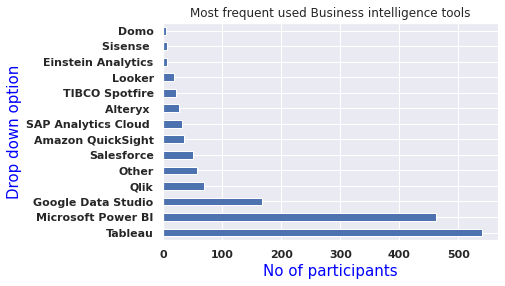

In [333]:
#Creating distribution of question Q32: "Which of the following business intelligence tools do you use most often"
# Question 32 was only asked to respondents that selected more than one choice for Question 31-A

df_survey['Q32'].value_counts().plot(kind='barh')
plt.ylabel("Drop down option",fontsize=15).set_color('blue')
plt.xlabel("No of participants",fontsize=15).set_color('blue')
plt.title("Most frequent used Business intelligence tools")
plt.rc('figure', titlesize=14) 

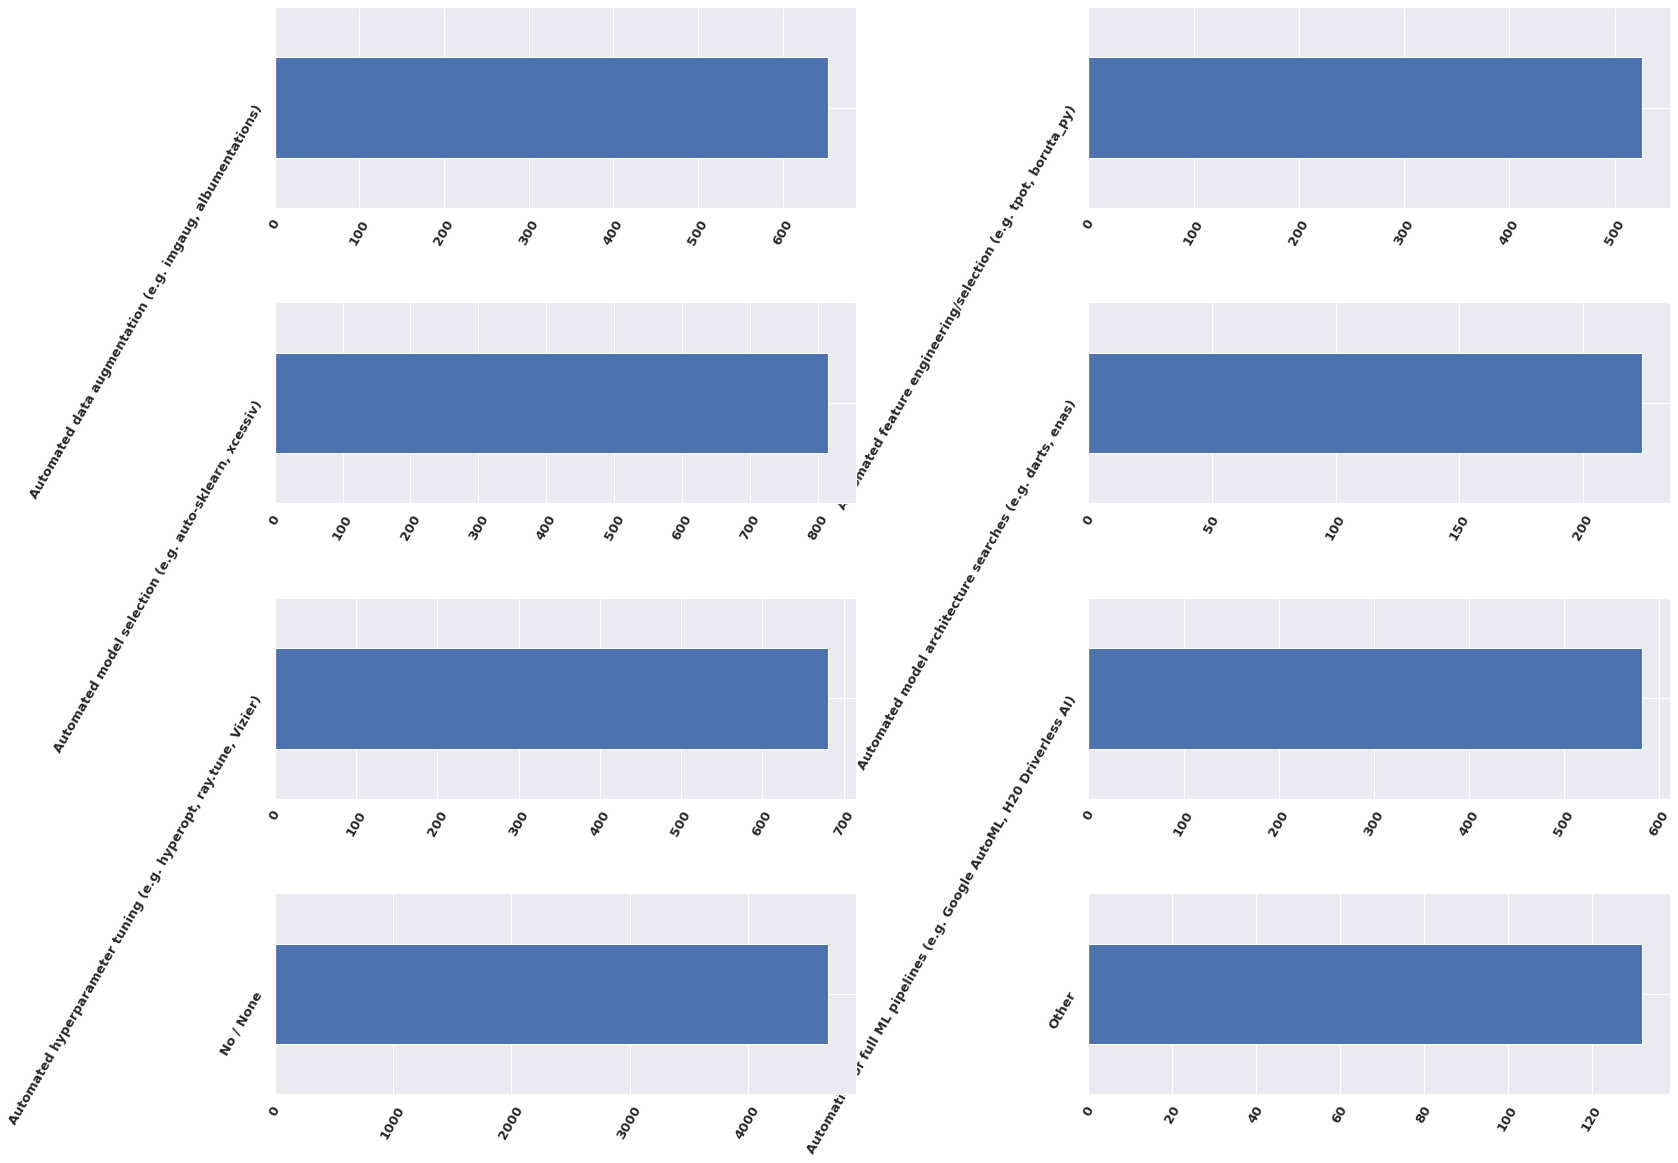

In [221]:
# Creating distribution of question Q33_A: "Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis"?

# Creating list of individual columns where responses to this multiple selection questions were recorded.


features_Q33_A = ['Q33_A_Part_1','Q33_A_Part_2','Q33_A_Part_3','Q33_A_Part_4','Q33_A_Part_5','Q33_A_Part_6','Q33_A_Part_7',
                  'Q33_A_OTHER']
fig,ax = plt.subplots(4,2,figsize=(25,20))
axe = ax.ravel()
for i,col in enumerate(features_Q33_A):
    df_survey[col].value_counts().plot(kind='barh', ax=axe[i])
    plt.subplots_adjust(wspace=.4,hspace=.47)
    axe[i].tick_params(labelsize=13,rotation=60)

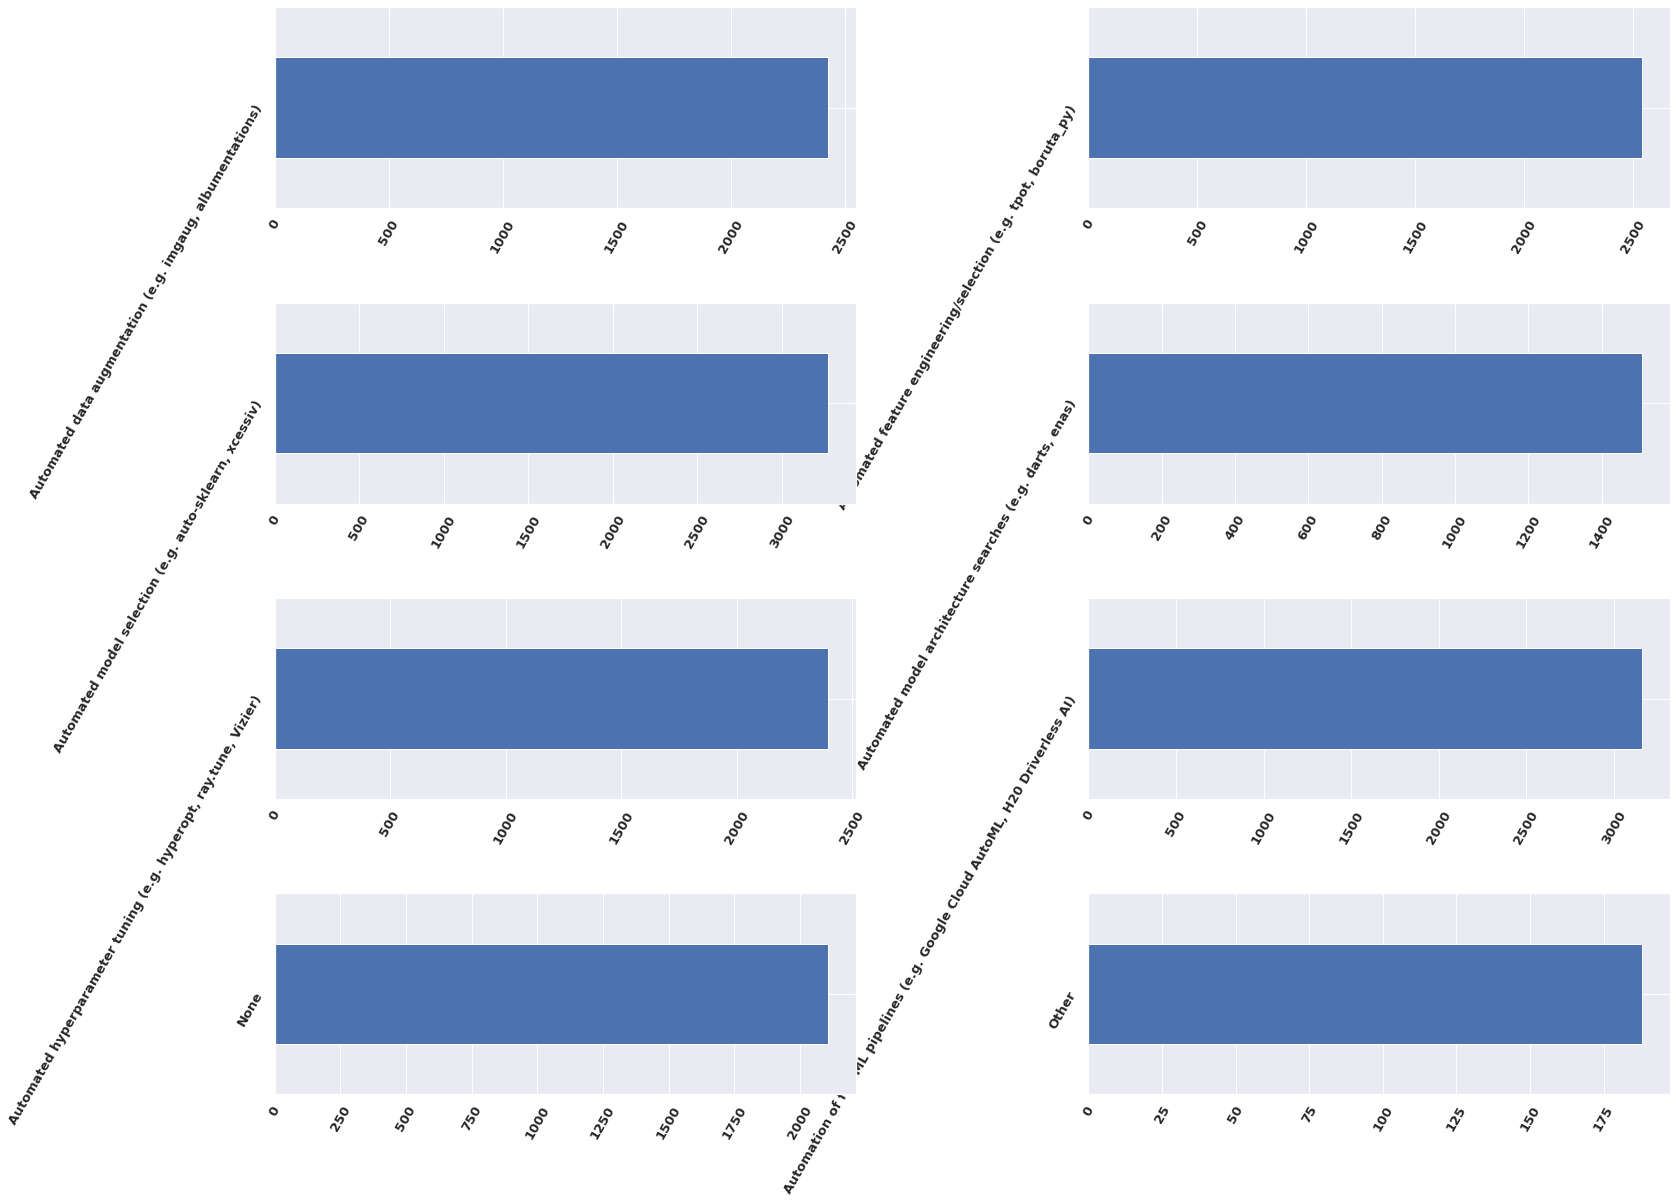

In [222]:
# Creating distribution of question Q33_B: "Which categories of automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years"?

# Creating list of individual columns where responses to this multiple selection questions were recorded.

features_Q33_B = ['Q33_B_Part_1','Q33_B_Part_2','Q33_B_Part_3','Q33_B_Part_4','Q33_B_Part_5','Q33_B_Part_6','Q33_B_Part_7',
                  'Q33_B_OTHER']
fig,ax = plt.subplots(4,2,figsize=(25,20))
axe = ax.ravel()
for i,col in enumerate(features_Q33_B):
    df_survey[col].value_counts().plot(kind='barh', ax=axe[i])
    plt.subplots_adjust(wspace=.4,hspace=.47)
    axe[i].tick_params(labelsize=13,rotation=60)

In [223]:
# Creating distribution of question Q34_A: "Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis"?
# Question 34-A was only asked to respondents that answered affirmatively to Question 33-A
# Creating list of individual columns where responses to this multiple selection questions were recorded.

features_Q34_A = ['Q34_A_Part_1','Q34_A_Part_2','Q34_A_Part_3','Q34_A_Part_4','Q34_A_Part_5','Q34_A_Part_6','Q34_A_Part_7',
                'Q34_A_Part_8','Q34_A_Part_9','Q34_A_Part_10','Q34_A_Part_11','Q34_A_OTHER']
fig,ax = plt.subplots(6,2,figsize=(25,20))
axe = ax.ravel()
for i,col in enumerate(features_Q34_A):
    df_survey[col].value_counts().plot(kind='barh', ax=axe[i])
    plt.subplots_adjust(wspace=.4,hspace=.47)
    axe[i].tick_params(labelsize=13,rotation=60)

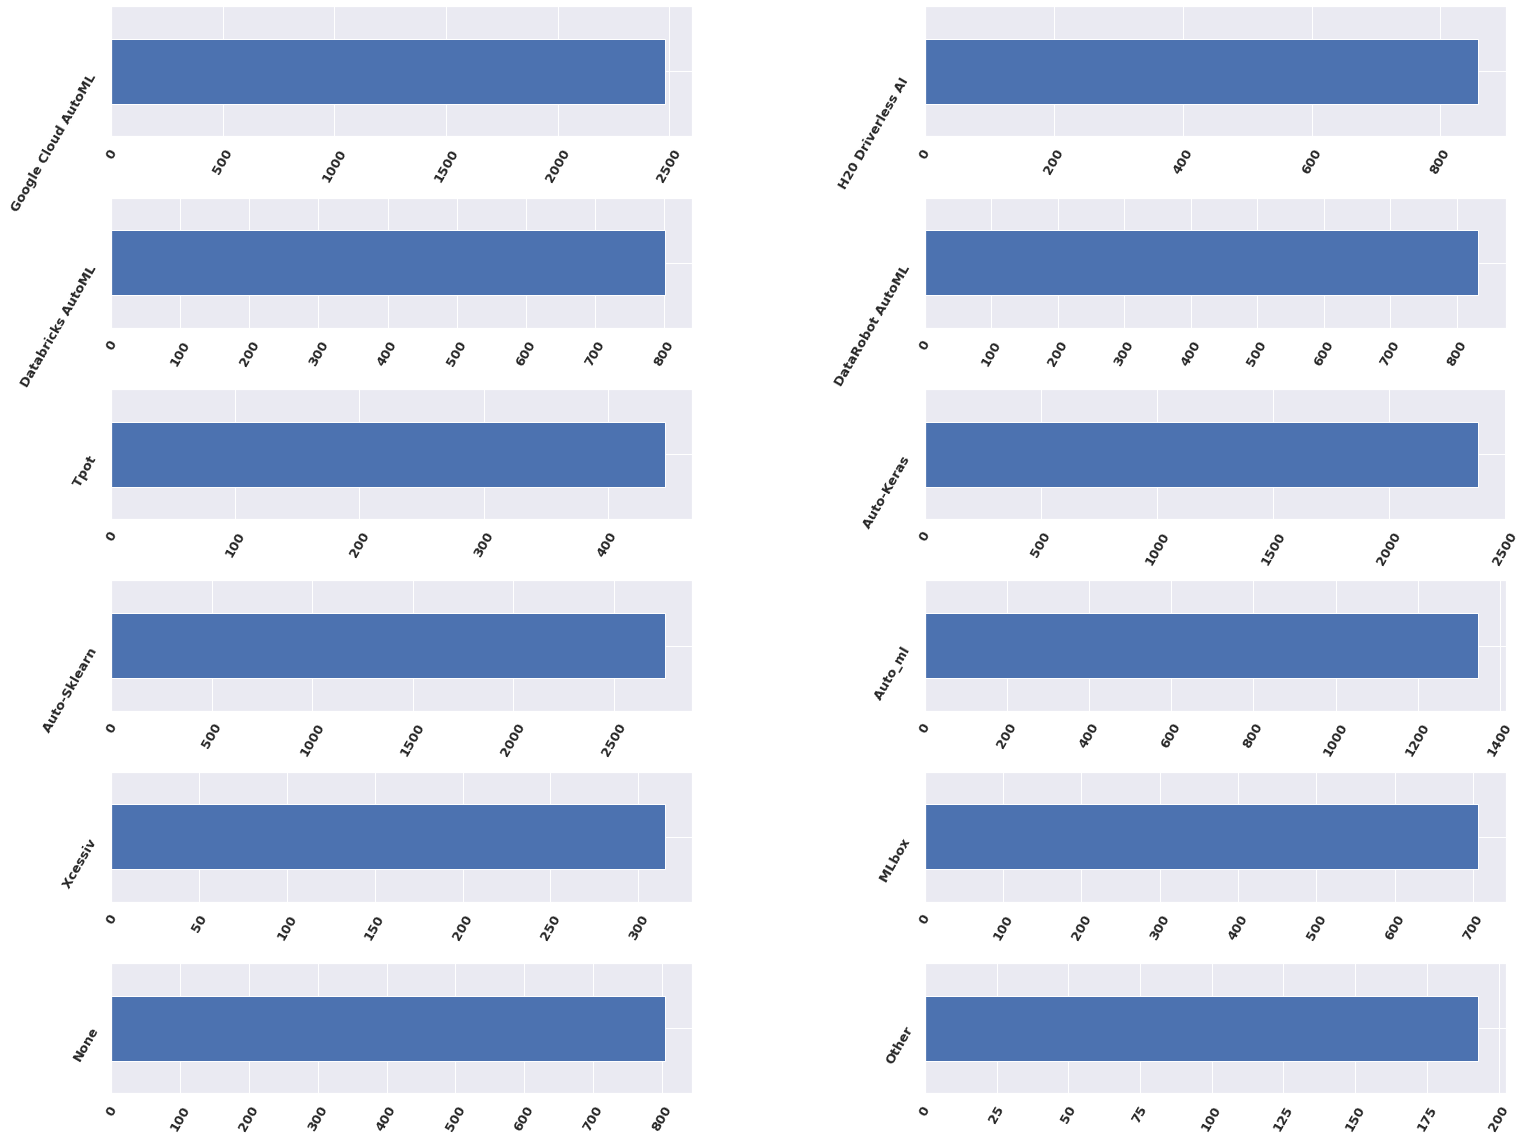

In [224]:
# Creating distribution of question Q34_B: "In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments"?

# Creating list of individual columns where responses to this multiple selection questions were recorded.

features_Q34_B = ['Q34_B_Part_1','Q34_B_Part_2','Q34_B_Part_3','Q34_B_Part_4','Q34_B_Part_5','Q34_B_Part_6','Q34_B_Part_7',
                'Q34_B_Part_8','Q34_B_Part_9','Q34_B_Part_10','Q34_B_Part_11','Q34_B_OTHER']
fig,ax = plt.subplots(6,2,figsize=(25,20))
axe = ax.ravel()
for i,col in enumerate(features_Q34_B):
    df_survey[col].value_counts().plot(kind='barh', ax=axe[i])
    plt.subplots_adjust(wspace=.4,hspace=.47)
    axe[i].tick_params(labelsize=13,rotation=60)

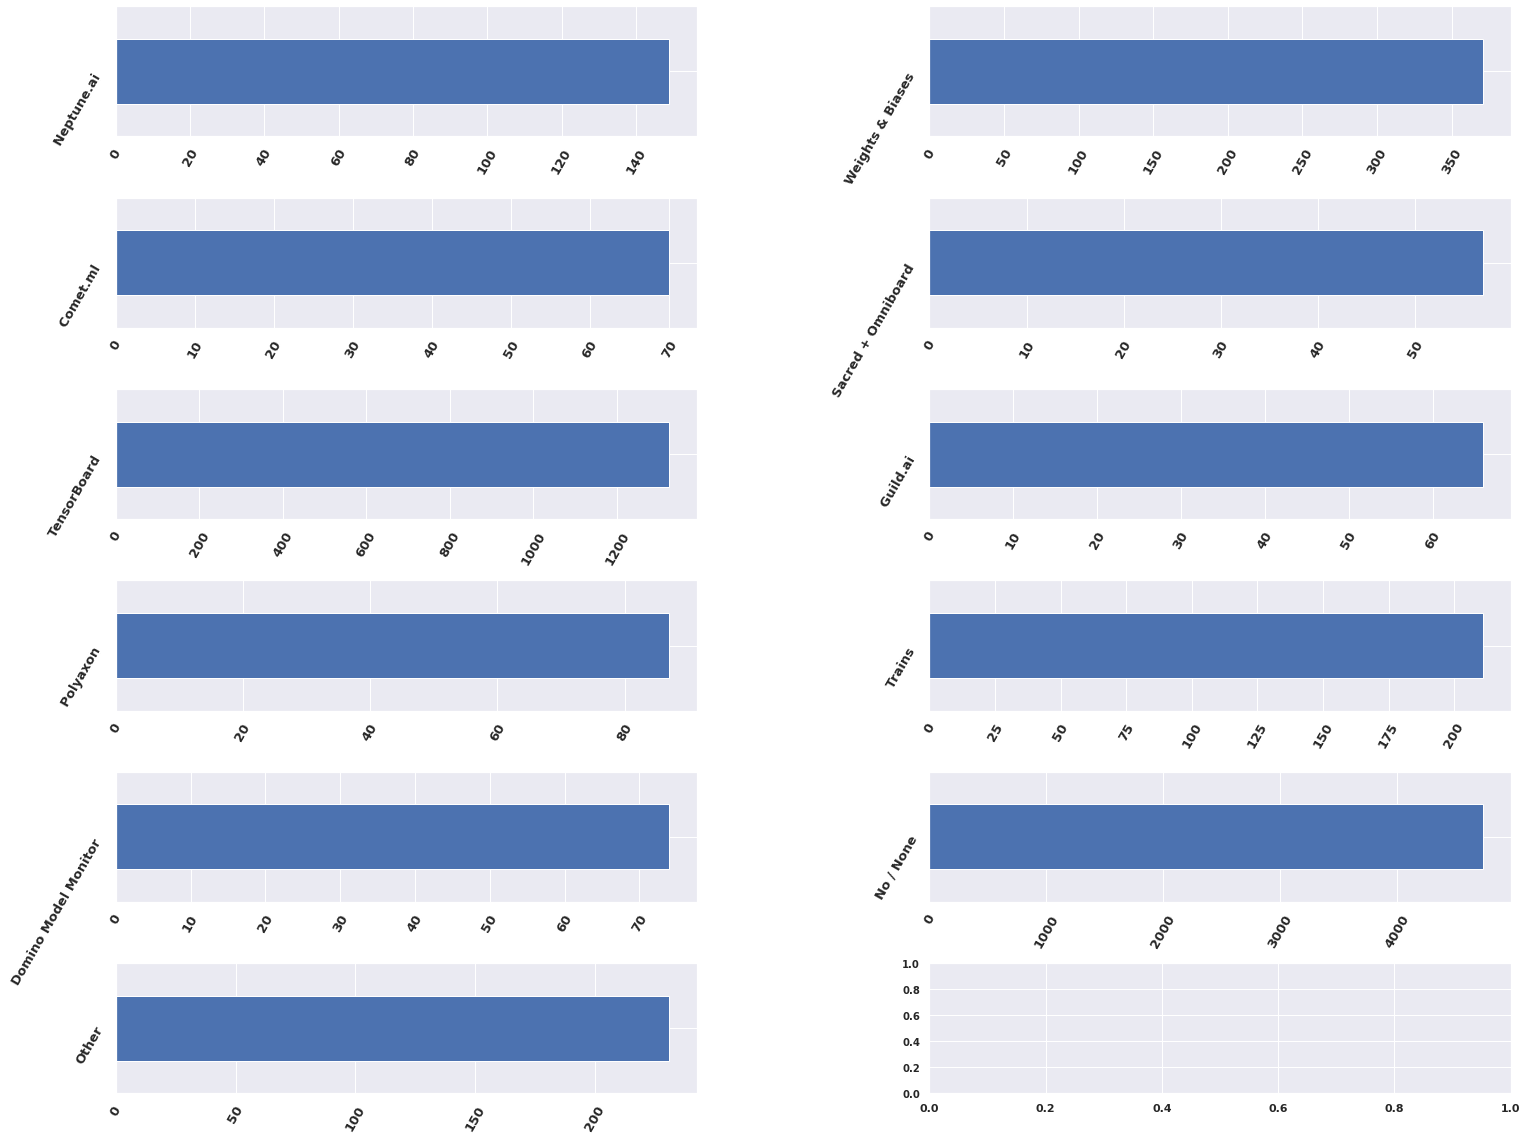

In [229]:
# Creating distribution of question Q35_A: "Do you use any tools to help manage machine learning experiments"?

# Creating list of individual columns where responses to this multiple selection questions were recorded.


features_Q35_A = ['Q35_A_Part_1','Q35_A_Part_2','Q35_A_Part_3','Q35_A_Part_4','Q35_A_Part_5','Q35_A_Part_6','Q35_A_Part_7',
                'Q35_A_Part_8','Q35_A_Part_9','Q35_A_Part_10','Q35_A_OTHER']
fig,ax = plt.subplots(6,2,figsize=(25,20))
axe = ax.ravel()
for i,col in enumerate(features_Q35_A):
    df_survey[col].value_counts().plot(kind='barh', ax=axe[i])
    plt.subplots_adjust(wspace=.4,hspace=.47)
    axe[i].tick_params(labelsize=13,rotation=60)

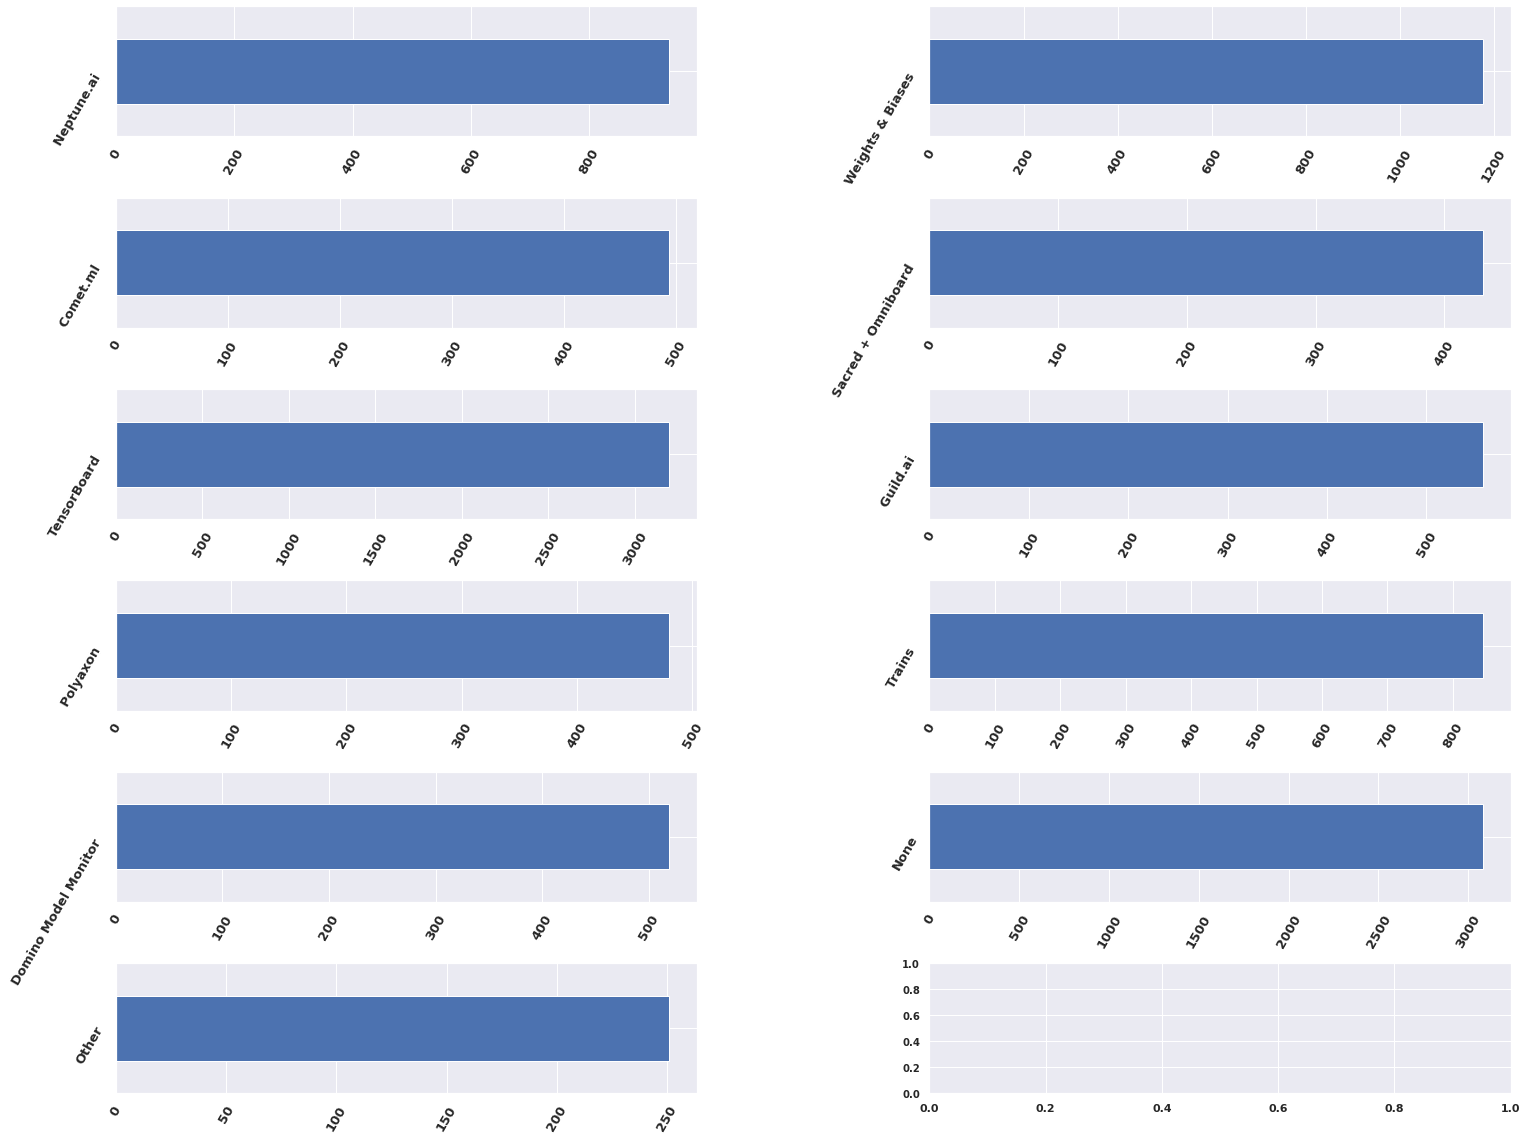

In [231]:
# Creating distribution of question Q35_B: "In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments"?

# Creating list of individual columns where responses to this multiple selection questions were recorded.


features_Q35_B = ['Q35_B_Part_1','Q35_B_Part_2','Q35_B_Part_3','Q35_B_Part_4','Q35_B_Part_5','Q35_B_Part_6','Q35_B_Part_7',
                'Q35_B_Part_8','Q35_B_Part_9','Q35_B_Part_10','Q35_B_OTHER']
fig,ax = plt.subplots(6,2,figsize=(25,20))
axe = ax.ravel()
for i,col in enumerate(features_Q35_B):
    df_survey[col].value_counts().plot(kind='barh', ax=axe[i])
    plt.subplots_adjust(wspace=.4,hspace=.47)
    axe[i].tick_params(labelsize=13,rotation=60)

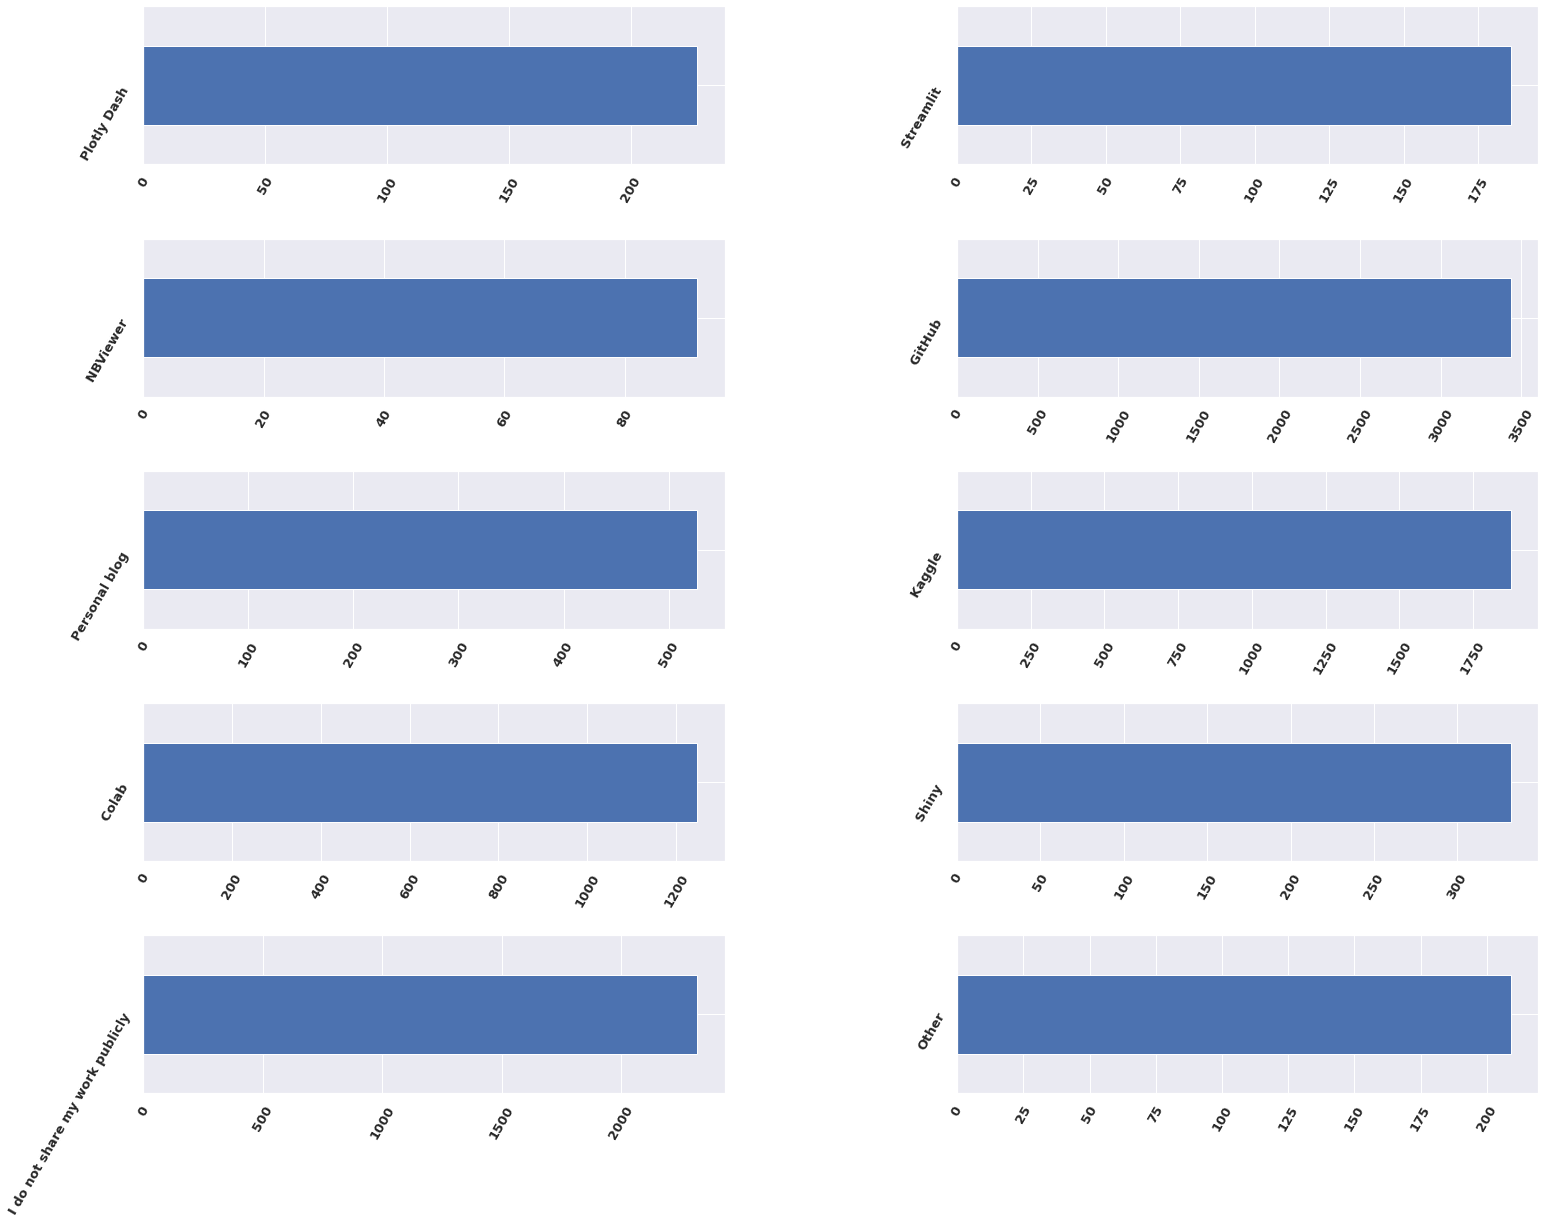

In [233]:
# Creating distribution of question Q36: "Where do you publicly share or deploy your data analysis or machine learning applications"?

# Creating list of individual columns where responses to this multiple selection questions were recorded.

features_Q36 = ['Q36_Part_1','Q36_Part_2','Q36_Part_3','Q36_Part_4','Q36_Part_5','Q36_Part_6','Q36_Part_7','Q36_Part_8',
                'Q36_Part_9','Q36_OTHER']
fig,ax = plt.subplots(5,2,figsize=(25,20))
axe = ax.ravel()
for i,col in enumerate(features_Q36):
    df_survey[col].value_counts().plot(kind='barh', ax=axe[i])
    plt.subplots_adjust(wspace=.4,hspace=.47)
    axe[i].tick_params(labelsize=13,rotation=60)

In [235]:
# Creating distribution of question Q37: "On which platforms have you begun or completed data science courses"?

# Creating list of individual columns where responses to this multiple selection questions were recorded.

features_Q37 = ['Q37_Part_1','Q37_Part_2','Q37_Part_3','Q37_Part_4','Q37_Part_5','Q37_Part_6','Q37_Part_7','Q37_Part_8',
                'Q37_Part_9','Q37_Part_10','Q37_Part_11','Q37_OTHER']
fig,ax = plt.subplots(6,2,figsize=(25,20))
axe = ax.ravel()
for i,col in enumerate(features_Q37):
    df_survey[col].value_counts().plot(kind='barh', ax=axe[i])
    plt.subplots_adjust(wspace=.4,hspace=.47)
    axe[i].tick_params(labelsize=13,rotation=60)

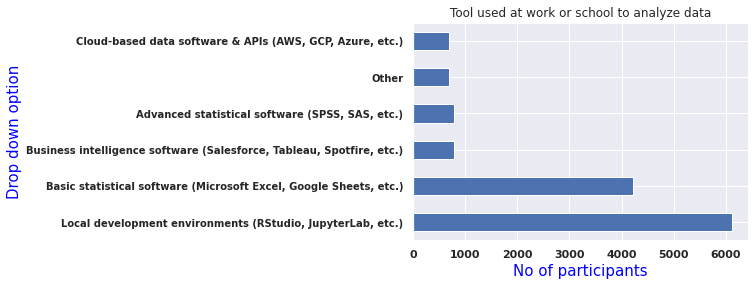

In [237]:
# Creating distribution of question Q38: "What is the primary tool that you use at work or school to analyze data"?

df_survey['Q38'].value_counts().plot(kind='barh')
plt.ylabel("Drop down option",fontsize=15).set_color('blue')
plt.xlabel("No of participants",fontsize=15).set_color('blue')
plt.title("Tool used at work or school to analyze data")
plt.rc('figure', titlesize=14) 

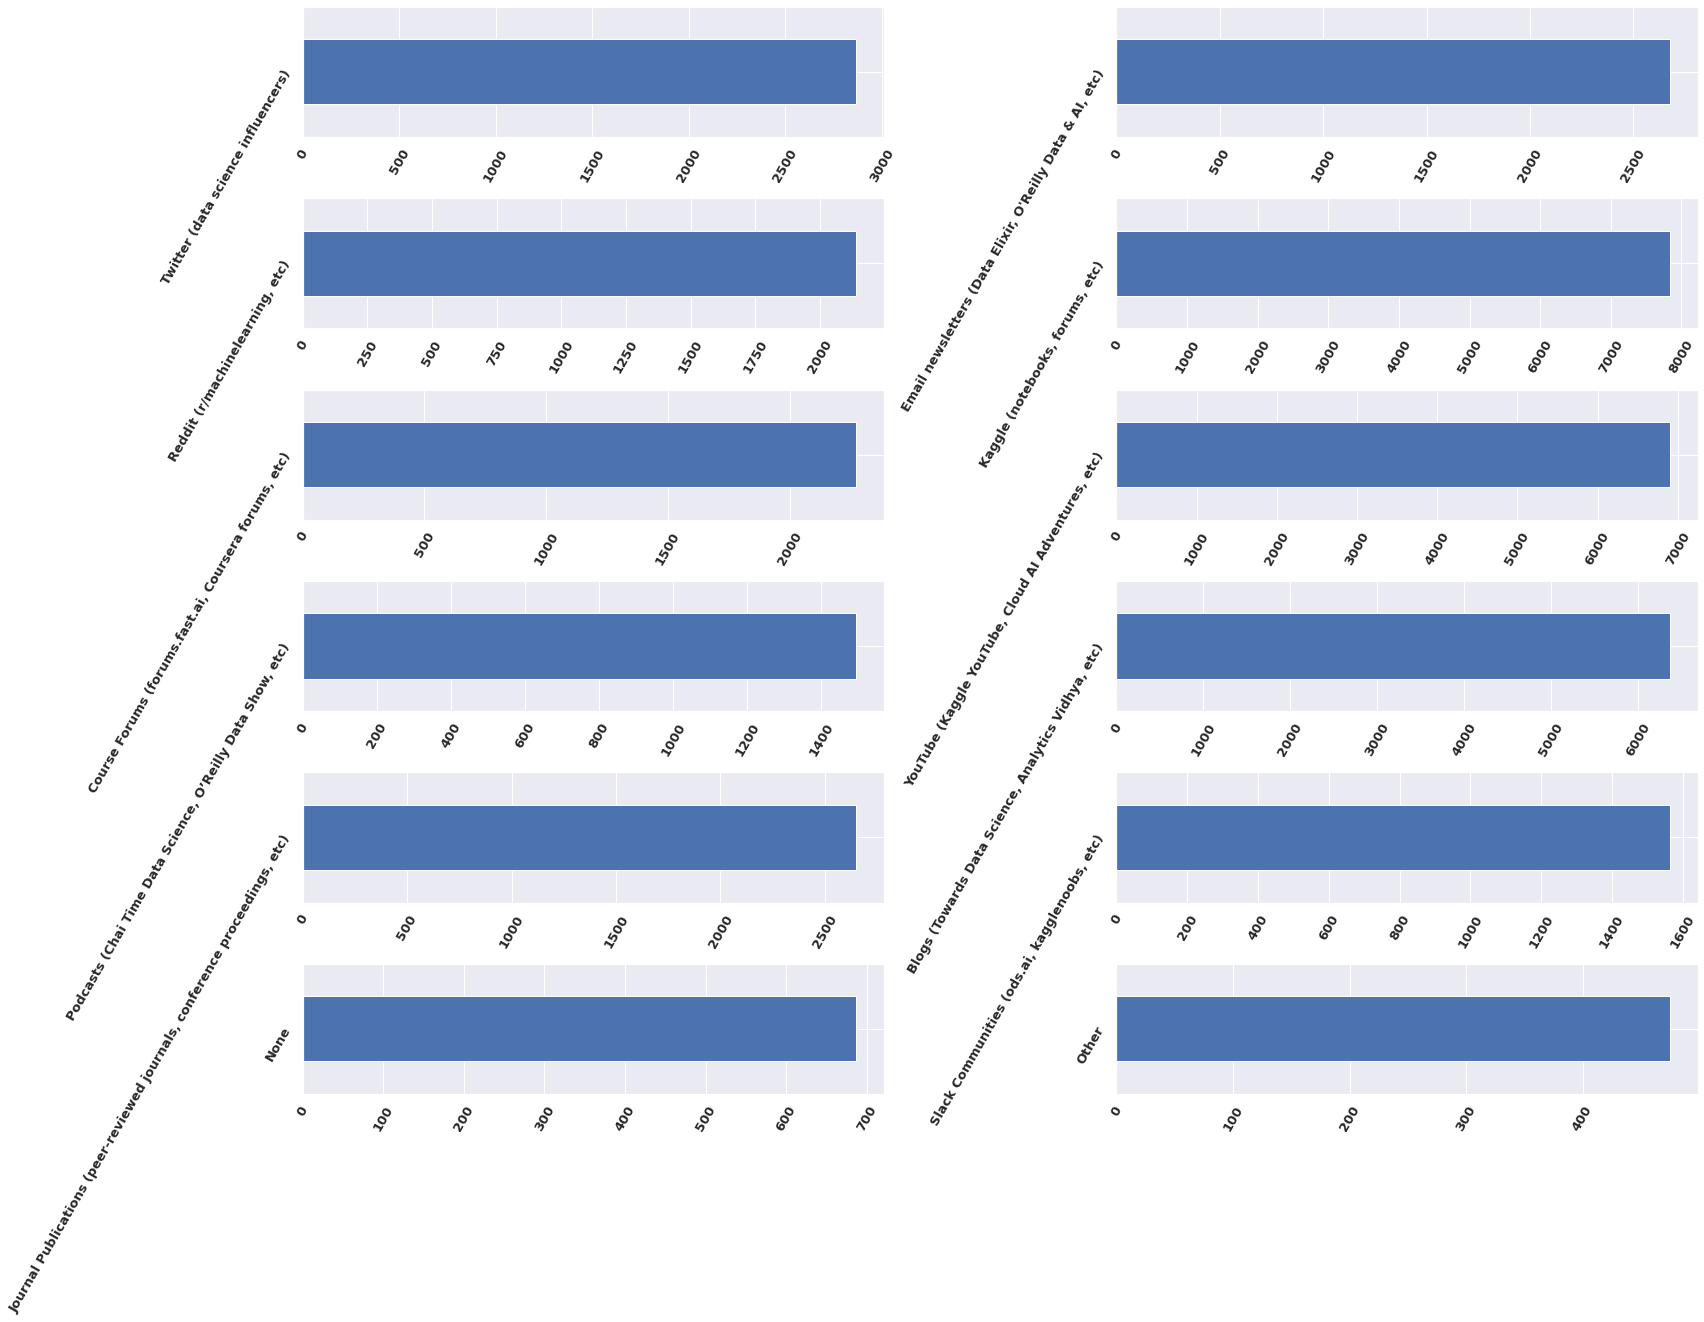

In [238]:
# Creating distribution of question Q39: "Who/what are your favorite media sources that report on data science topics"?

# Creating list of individual columns where responses to this multiple selection questions were recorded.

features_Q39 = ['Q39_Part_1','Q39_Part_2','Q39_Part_3','Q39_Part_4','Q39_Part_5','Q39_Part_6','Q39_Part_7','Q39_Part_8',
                'Q39_Part_9','Q39_Part_10','Q39_Part_11','Q39_OTHER']
fig,ax = plt.subplots(6,2,figsize=(25,20))
axe = ax.ravel()
for i,col in enumerate(features_Q39):
    df_survey[col].value_counts().plot(kind='barh', ax=axe[i])
    plt.subplots_adjust(wspace=.4,hspace=.47)
    axe[i].tick_params(labelsize=13,rotation=60)

In [24]:
# Calculating missing value per rows and displaying data in descending order.
missing_data = pd.concat([df_survey.isnull().sum(axis=1), 100 * df_survey.isnull().mean(axis=1)], axis=1)
missing_data.columns=['count', '%']
missing_data.sort_values(by='count', ascending=False).head(10)

count          %
13426    351  98.873239
7946     351  98.873239
14718    351  98.873239
18905    351  98.873239
16496    351  98.873239
5614     351  98.873239
7869     351  98.873239
2485     351  98.873239
12388    351  98.873239
5587     351  98.873239

In [ ]:
d